In [1]:
import numpy as np
from regain.data.base import load_Petrobras
from regain.hmm.higher_order_hmm_graphical_lasso import HMM_GraphicalLasso
from regain.hmm.utils import corr_plot,plot_results_cluster,cov2corr,cluster_returns_recap
import matplotlib.pyplot as plt
from decimal import Decimal

/Users/federicociech/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
Petrob, BrazCurr,WTI = load_Petrobras()
print(Petrob, BrazCurr,WTI)

           Ultimo Apertura Massimo Minimo    Vol.   Var. %
Data                                                      
20.03.2020  12,22    13,15   13,47  11,85  38,67M   -1,85%
19.03.2020  12,45    11,00   13,05  10,50  68,11M   12,67%
18.03.2020  11,05    11,70   12,20  10,50  73,47M  -15,52%
17.03.2020  13,08    13,66   14,11  13,00  53,01M   -0,38%
16.03.2020  13,13    13,99   14,67  13,10  39,54M  -17,21%
...           ...      ...     ...    ...     ...      ...
28.02.2007  19,57    19,71   19,83  19,30   5,30M   -0,31%
27.02.2007  19,63    19,69   20,10  19,42   4,73M   -4,43%
26.02.2007  20,54    20,54   20,71  20,51   1,75M    0,44%
23.02.2007  20,45    20,43   20,69  20,41   2,88M    0,44%
22.02.2007  20,36    20,20   20,40  20,08   3,31M    1,39%

[3233 rows x 6 columns]             Ultimo Apertura Massimo  Minimo  Var. %
Data                                               
20.03.2020  5,0640   5,0010  5,0662  4,9820  -0,63%
19.03.2020  5,0960   5,1098  5,2140  5,0682  -0,23%


In [3]:
ind_WTI = np.zeros(np.size(WTI.index),bool)

for i,date in enumerate(WTI.index):
    ind_WTI[i] = np.any(Petrob.index==date)
print(np.sum(ind_WTI))

New_Dates = WTI.index[ind_WTI]



ind_braz = np.zeros(np.size(BrazCurr.index),bool)

for i,date in enumerate(BrazCurr.index):
    ind_braz[i] = np.any(New_Dates==date)
print(np.sum(ind_braz))
 
ind_Petr = np.zeros(np.size(Petrob.index),bool)

for i,date in enumerate(Petrob.index):
    ind_Petr[i] = np.any(New_Dates==date)
print(np.sum(ind_Petr))



3198
3198
3198


In [4]:
BrazCurr_filt = BrazCurr['Ultimo'].values[ind_braz]
WTI_filt = WTI['Ultimo'].values[ind_WTI]
Petrob_filt = Petrob['Ultimo'].values[ind_Petr]
data = np.zeros((np.size(BrazCurr_filt),3))

for i in range(np.size(BrazCurr_filt)):
    data[i,0] = float(BrazCurr_filt[i].replace(',','.'))
    data[i,1] = float(Petrob_filt[i].replace(',','.'))
    data[i,2] = float(WTI_filt[i].replace(',','.'))


In [5]:
# Compute returns
returns_mat = np.zeros((np.size(data,axis = 0)-1,np.size(data,axis = 1)))

for i in range(1,np.size(data,axis = 0)):
    returns_mat[i-1,:] = (data[i,:]-data[i-1,:])/data[i-1,:]*100

In [6]:
print(returns_mat)

[[  0.63191153   1.88216039  12.43869817]
 [  0.22566719 -11.24497992 -19.23076923]
 [ -1.90895742  18.37104072  32.3024055 ]
 ...
 [ -2.41629595   4.63576159  -0.11389522]
 [  0.26872691  -0.43816943  -0.40723245]
 [ -0.35893754  -0.4400978   -0.31076219]]


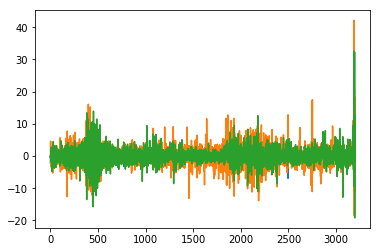

In [7]:
returns_mat = np.flip(returns_mat,axis=0)

plt.plot(returns_mat)

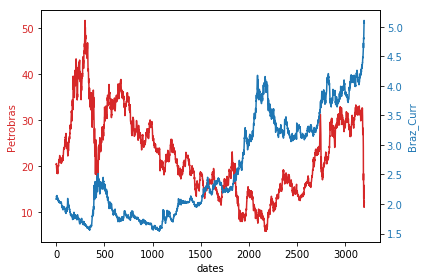

In [8]:
data = np.flip(data,axis=0)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('dates')
ax1.set_ylabel('Petrobras', color=color)
ax1.plot( data[:,1], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Braz_Curr', color=color)  # we already handled the x-label with ax1
ax2.plot( data[:,0], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

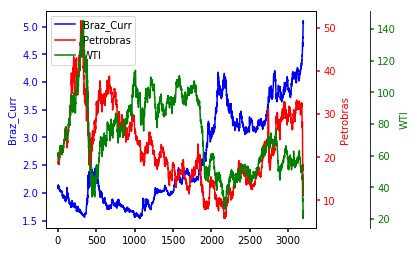

In [9]:
import matplotlib.pyplot as plt


def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot(data[:,0], "b-", label="Braz_Curr")
p2, = par1.plot(data[:,1], "r-", label="Petrobras")
p3, = par2.plot(data[:,2], "g-", label="WTI")


host.set_ylabel("Braz_Curr")
par1.set_ylabel("Petrobras")
par2.set_ylabel("WTI")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

In [10]:
lam = 0
max_iter = 300
N_states = 3

mdl = HMM_GraphicalLasso(alpha=lam,
                         n_clusters=N_states,
                         verbose=False,
                         max_iter=max_iter,
                         mode='scaled',
                         warm_restart=True,
                         repetitions=50,
                         n_jobs=-1)
mdl.fit(returns_mat)

HMM_GraphicalLasso(alpha=0, init_params={}, max_iter=300, mode='scaled',
                   n_clusters=3, n_jobs=-1, repetitions=50, tol=0.0001,
                   verbose=False, warm_restart=True)

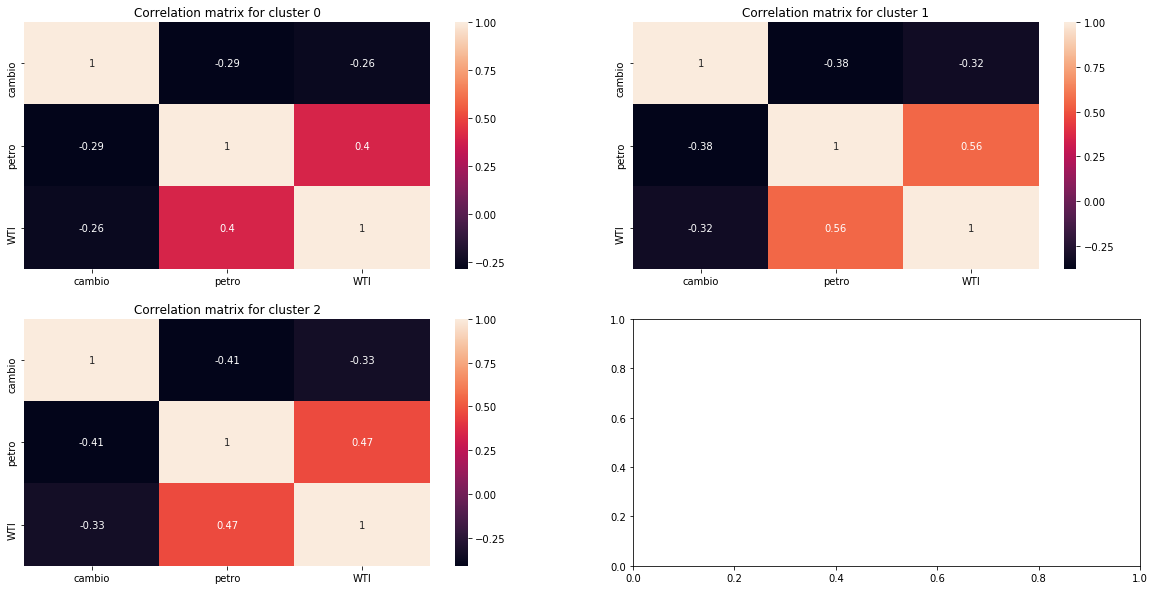

In [11]:
corr_plot(mdl.covariances_,labels=["cambio","petro","WTI"],covcorr = True)

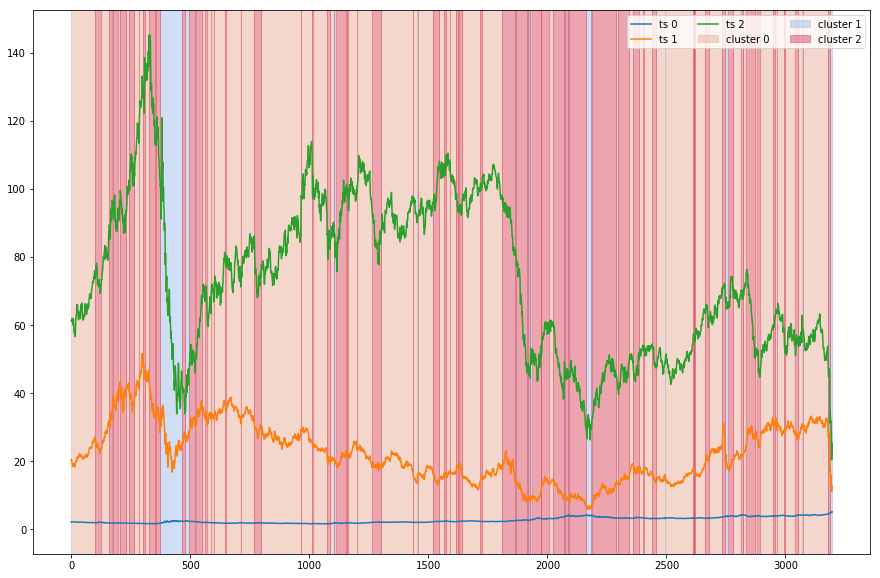

In [12]:
plot_results_cluster(data, mdl.labels_)

In [ ]:
from regain.hmm.utils_portfolio_optimization import PO_with_HMM_GMM
N_backtest = 1000
Invest_wealth = 1e5


PLpred,PLtod,PLemp = PO_with_HMM_GMM(returns_mat,
                                     data[1:,:],
                                     np.linspace(0,50,3),
                                     [2,3],
                                     N_max_mem = 1500,
                                     N_test=N_backtest,
                                     Wealth=Invest_wealth,
                                     mu_p= 0.1,
                                     OP_method = 'Min_Var_Fix_return',
                                     leverage=True)

100%|██████████| 3/3 [28:55<00:00, 578.65s/it]


Pred changed cluster
Today changed cluster
[2.93017811 1.         1.34292904] [-0.12885707  0.24695931  0.24353181] [-0.37757418  0.24695931  0.32704594]
[2.93017811 1.         1.34292904] [-0.12885707  0.24695931  0.24353181] [-0.37757418  0.24695931  0.32704594]
[4.22156328 1.         1.124932  ] [ 0.05810374 -0.09063534 -0.05352282] [ 0.24528863 -0.09063534 -0.06020953]
Price difference -0.02740000000000009 N purchased pred 8074.0 N purchased today 8074.0 N purchased emp 14423.0
Price difference -0.25 N purchased pred 1504.0 N purchased today 1504.0 N purchased emp 2171.0
Price difference -1.3999999999999986 N purchased pred 1443.0 N purchased today 1443.0 N purchased emp 636.0
P&L predict [-2617.4276]
P&L today [-2617.4276]
P&L emp [-1828.3402]
[2.9297928  1.         1.34113937] [-0.12723442  0.25226362  0.25180797] [-0.3727705   0.25226362  0.33770958]
[2.9297928  1.         1.34113937] [-0.12723442  0.25226362  0.25180797] [-0.3727705   0.25226362  0.33770958]
[4.42563403 1.     

In [41]:
from regain.hmm.utils_pred import reg_pred_HMM_GMM
N_pred = 30
Data = data[-2500:-865,:]
ret = returns_mat[-2500:-865,:]



ret_pred,_, Val_Pred =   reg_pred_HMM_GMM(ret,
                                   Data,
                                   [10,20,30,40,50],
                                   [2,3,4],
                                   N_retrain = N_pred,
                                   N_val = N_pred,
                                   p=2,
                                   N_test = N_pred,
                                   meth = 'viterbi',
                                   pred_meth = 'rolling',
                                   recrossval = False,
                                   CV_meth = 'reg',
                                   perc_var=True)



  0%|          | 0/5 [00:00<?, ?it/s]


  0%|          | 0/3 [00:00<?, ?it/s]

Prev 0 Var 0





 33%|███▎      | 1/3 [13:36<27:13, 816.71s/it]


 67%|██████▋   | 2/3 [1:12:29<27:11, 1631.51s/it]


100%|██████████| 3/3 [2:24:42<00:00, 2894.20s/it]


 20%|██        | 1/5 [2:24:42<9:38:50, 8682.59s/it]


  0%|          | 0/3 [00:00<?, ?it/s]


 33%|███▎      | 1/3 [09:46<19:33, 586.69s/it]


 67%|██████▋   | 2/3 [51:16<19:17, 1157.57s/it]


100%|██████████| 3/3 [1:59:34<00:00, 2391.48s/it]


 40%|████      | 2/5 [4:24:17<6:51:30, 8230.14s/it]


  0%|          | 0/3 [00:00<?, ?it/s]


 33%|███▎      | 1/3 [09:51<19:42, 591.45s/it]


 67%|██████▋   | 2/3 [46:07<17:46, 1066.74s/it]


100%|██████████| 3/3 [1:50:00<00:00, 2200.18s/it]


 60%|██████    | 3/5 [6:14:17<4:18:02, 7741.26s/it]


  0%|          | 0/3 [00:00<?, ?it/s]


 33%|███▎      | 1/3 [08:20<16:41, 500.80s/it]


 67%|██████▋   | 2/3 [40:05<15:21, 921.94s/it]/Users/federicociech/PycharmProjects/regain/regain/hmm/utils.py:97: RuntimeWarning: divide by zero encountered in log
  deltas[0, :] = np.log(pis * probs[0, :])
/Use

(50, 4)
0.8328714651529967




  0%|          | 0/5 [00:00<?, ?it/s]


  0%|          | 0/3 [00:00<?, ?it/s]

MAE pred 0 Var 0 : 0.9999764730301671
Prev 0 Var 1





 33%|███▎      | 1/3 [09:00<18:00, 540.38s/it]


 67%|██████▋   | 2/3 [1:00:15<21:40, 1300.68s/it]


100%|██████████| 3/3 [2:08:09<00:00, 2563.09s/it]


 20%|██        | 1/5 [2:08:09<8:32:37, 7689.26s/it]


  0%|          | 0/3 [00:00<?, ?it/s]


 33%|███▎      | 1/3 [10:15<20:30, 615.46s/it]


 67%|██████▋   | 2/3 [1:07:13<24:16, 1456.17s/it]


100%|██████████| 3/3 [2:18:17<00:00, 2765.70s/it]


 40%|████      | 2/5 [4:26:26<6:33:34, 7871.61s/it]


  0%|          | 0/3 [00:00<?, ?it/s]


 33%|███▎      | 1/3 [09:41<19:22, 581.13s/it]


 67%|██████▋   | 2/3 [1:01:03<22:11, 1331.56s/it]


100%|██████████| 3/3 [2:08:23<00:00, 2567.96s/it]


 60%|██████    | 3/5 [6:34:50<4:20:42, 7821.29s/it]


  0%|          | 0/3 [00:00<?, ?it/s]


 33%|███▎      | 1/3 [10:32<21:05, 632.53s/it]/Users/federicociech/PycharmProjects/regain/regain/hmm/utils.py:97: RuntimeWarning: divide by zero encountered in log
  deltas[0, :] = np.log(pis * probs[0, :])
/Users/federicociech/opt/anaconda3/lib/python3.7/

(10, 3)
2.7253326737694334





  0%|          | 0/5 [00:00<?, ?it/s]


  0%|          | 0/3 [00:00<?, ?it/s]

MAE pred 0 Var 1 : 2.451984078614571
Prev 0 Var 2





 33%|███▎      | 1/3 [16:45<33:31, 1005.61s/it]/Users/federicociech/PycharmProjects/regain/regain/hmm/utils.py:97: RuntimeWarning: divide by zero encountered in log
  deltas[0, :] = np.log(pis * probs[0, :])



 67%|██████▋   | 2/3 [52:59<22:36, 1356.20s/it]


100%|██████████| 3/3 [1:55:59<00:00, 2319.67s/it]


 20%|██        | 1/5 [1:55:59<7:43:56, 6959.03s/it]


  0%|          | 0/3 [00:00<?, ?it/s]


 33%|███▎      | 1/3 [12:48<25:36, 768.18s/it]


 67%|██████▋   | 2/3 [1:00:27<23:15, 1395.60s/it]


100%|██████████| 3/3 [2:03:11<00:00, 2463.84s/it]


 40%|████      | 2/5 [3:59:10<5:54:26, 7088.78s/it]


  0%|          | 0/3 [00:00<?, ?it/s]


 33%|███▎      | 1/3 [14:09<28:18, 849.02s/it]


 67%|██████▋   | 2/3 [1:04:23<24:58, 1498.56s/it]


100%|██████████| 3/3 [2:06:09<00:00, 2523.30s/it]


 60%|██████    | 3/5 [6:05:20<4:01:06, 7233.12s/it]


  0%|          | 0/3 [00:00<?, ?it/s]


 33%|███▎      | 1/3 [13:00<26:01, 780.68s/it]


 67%|██████▋   | 2/3 [1:02:00<23:48, 1428.54s/i

(40, 3)
2.1246961699459535


MAE pred 0 Var 2 : 1.8796267576927526
Prev 1 Var 0
MAE pred 1 Var 0 : 0.11898239770807814
Prev 1 Var 1
MAE pred 1 Var 1 : 3.710218826849965
Prev 1 Var 2
MAE pred 1 Var 2 : 2.3651890527463526
Prev 2 Var 0
MAE pred 2 Var 0 : 1.0307528085825948
Prev 2 Var 1
MAE pred 2 Var 1 : 0.5157985131498053
Prev 2 Var 2
MAE pred 2 Var 2 : 0.303084467648574
Prev 3 Var 0
MAE pred 3 Var 0 : 0.6434276595343464
Prev 3 Var 1
MAE pred 3 Var 1 : 3.847579632982092
Prev 3 Var 2
MAE pred 3 Var 2 : 3.2395580190153055
Prev 4 Var 0
MAE pred 4 Var 0 : 0.5439255083063114
Prev 4 Var 1
MAE pred 4 Var 1 : 4.0696972000236284
Prev 4 Var 2
MAE pred 4 Var 2 : 3.936158590654667
Prev 5 Var 0
MAE pred 5 Var 0 : 1.459728550758617
Prev 5 Var 1
MAE pred 5 Var 1 : 1.6115195803076963
Prev 5 Var 2
MAE pred 5 Var 2 : 0.12317667037018731
Prev 6 Var 0
MAE pred 6 Var 0 : 0.17477575458481004
Prev 6 Var 1
MAE pred 6 Var 1 : 4.3018924218042125
Prev 6 Var 2
MAE pred 6 Var 2 : 5.334674912189414
Prev 7 Var 0
MAE pred 7 Var 0 : 0.5494937539692

/Users/federicociech/PycharmProjects/regain/regain/hmm/utils.py:97: RuntimeWarning: divide by zero encountered in log
  deltas[0, :] = np.log(pis * probs[0, :])


MAE pred 13 Var 2 : 3.0470729559461103
Prev 14 Var 0
MAE pred 14 Var 0 : 0.5034986003667742
Prev 14 Var 1
MAE pred 14 Var 1 : 1.4016893274983147
Prev 14 Var 2
MAE pred 14 Var 2 : 1.4847977121797566
Prev 15 Var 0
MAE pred 15 Var 0 : 1.0453908081901746
Prev 15 Var 1
MAE pred 15 Var 1 : 0.8298167852445454
Prev 15 Var 2
MAE pred 15 Var 2 : 0.6902020660372816
Prev 16 Var 0
MAE pred 16 Var 0 : 0.9433306409545468
Prev 16 Var 1
MAE pred 16 Var 1 : 1.4133912467995127
Prev 16 Var 2
MAE pred 16 Var 2 : 1.8568486289902053
Prev 17 Var 0
MAE pred 17 Var 0 : 0.153358835156926
Prev 17 Var 1
MAE pred 17 Var 1 : 0.09920525533903317
Prev 17 Var 2
MAE pred 17 Var 2 : 0.869958581726888
Prev 18 Var 0
MAE pred 18 Var 0 : 0.2886012992552458
Prev 18 Var 1
MAE pred 18 Var 1 : 2.6182647988297276
Prev 18 Var 2
MAE pred 18 Var 2 : 4.140735190129274
Prev 19 Var 0
MAE pred 19 Var 0 : 0.68976547637192
Prev 19 Var 1


/Users/federicociech/PycharmProjects/regain/regain/hmm/utils.py:97: RuntimeWarning: divide by zero encountered in log
  deltas[0, :] = np.log(pis * probs[0, :])


MAE pred 19 Var 1 : 0.8322947368849566
Prev 19 Var 2
MAE pred 19 Var 2 : 2.5411228091689315
Prev 20 Var 0
MAE pred 20 Var 0 : 0.12186314627689282
Prev 20 Var 1
MAE pred 20 Var 1 : 5.386596630197193
Prev 20 Var 2


/Users/federicociech/PycharmProjects/regain/regain/hmm/utils.py:97: RuntimeWarning: divide by zero encountered in log
  deltas[0, :] = np.log(pis * probs[0, :])


MAE pred 20 Var 2 : 2.536785524731872
Prev 21 Var 0
MAE pred 21 Var 0 : 0.6163047167444239
Prev 21 Var 1


/Users/federicociech/PycharmProjects/regain/regain/hmm/utils.py:97: RuntimeWarning: divide by zero encountered in log
  deltas[0, :] = np.log(pis * probs[0, :])


MAE pred 21 Var 1 : 2.8286129374592712
Prev 21 Var 2
MAE pred 21 Var 2 : 1.4638598525279973
Prev 22 Var 0
MAE pred 22 Var 0 : 2.776283947532351
Prev 22 Var 1
MAE pred 22 Var 1 : 0.3895889964903073
Prev 22 Var 2


/Users/federicociech/PycharmProjects/regain/regain/hmm/utils.py:97: RuntimeWarning: divide by zero encountered in log
  deltas[0, :] = np.log(pis * probs[0, :])


MAE pred 22 Var 2 : 0.055622385402329666
Prev 23 Var 0
MAE pred 23 Var 0 : 0.5536695445780766
Prev 23 Var 1
MAE pred 23 Var 1 : 2.4569147784037706
Prev 23 Var 2


/Users/federicociech/PycharmProjects/regain/regain/hmm/utils.py:97: RuntimeWarning: divide by zero encountered in log
  deltas[0, :] = np.log(pis * probs[0, :])


MAE pred 23 Var 2 : 6.230110920329585
Prev 24 Var 0
MAE pred 24 Var 0 : 1.6206789219140716
Prev 24 Var 1


/Users/federicociech/PycharmProjects/regain/regain/hmm/utils.py:97: RuntimeWarning: divide by zero encountered in log
  deltas[0, :] = np.log(pis * probs[0, :])


MAE pred 24 Var 1 : 5.861205461672029
Prev 24 Var 2
MAE pred 24 Var 2 : 3.335331939610349
Prev 25 Var 0
MAE pred 25 Var 0 : 0.894386664273325
Prev 25 Var 1
MAE pred 25 Var 1 : 3.6572354847002626
Prev 25 Var 2


/Users/federicociech/PycharmProjects/regain/regain/hmm/utils.py:97: RuntimeWarning: divide by zero encountered in log
  deltas[0, :] = np.log(pis * probs[0, :])


MAE pred 25 Var 2 : 1.4275569727185884
Prev 26 Var 0
MAE pred 26 Var 0 : 2.040274443273486
Prev 26 Var 1
MAE pred 26 Var 1 : 8.214476451332064
Prev 26 Var 2


/Users/federicociech/PycharmProjects/regain/regain/hmm/utils.py:97: RuntimeWarning: divide by zero encountered in log
  deltas[0, :] = np.log(pis * probs[0, :])


MAE pred 26 Var 2 : 3.3725166725582287
Prev 27 Var 0
MAE pred 27 Var 0 : 0.7514195442606237
Prev 27 Var 1


/Users/federicociech/PycharmProjects/regain/regain/hmm/utils.py:97: RuntimeWarning: divide by zero encountered in log
  deltas[0, :] = np.log(pis * probs[0, :])


MAE pred 27 Var 1 : 1.1316981862100497
Prev 27 Var 2
MAE pred 27 Var 2 : 2.461745917391263
Prev 28 Var 0
MAE pred 28 Var 0 : 1.2490583020998995
Prev 28 Var 1
MAE pred 28 Var 1 : 2.5236685829988783
Prev 28 Var 2


/Users/federicociech/PycharmProjects/regain/regain/hmm/utils.py:97: RuntimeWarning: divide by zero encountered in log
  deltas[0, :] = np.log(pis * probs[0, :])


MAE pred 28 Var 2 : 0.2490443070895424
Prev 29 Var 0
MAE pred 29 Var 0 : 1.2535346905716893
Prev 29 Var 1
MAE pred 29 Var 1 : 2.4672075984417674
Prev 29 Var 2


/Users/federicociech/PycharmProjects/regain/regain/hmm/utils.py:97: RuntimeWarning: divide by zero encountered in log
  deltas[0, :] = np.log(pis * probs[0, :])


MAE pred 29 Var 2 : 1.9658860007410903


[1]	valid_0's l2: 1.11425	valid_0's l1: 0.84389
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 1.11547	valid_0's l1: 0.842218
[3]	valid_0's l2: 1.1165	valid_0's l1: 0.839918
[4]	valid_0's l2: 1.10455	valid_0's l1: 0.833182
[5]	valid_0's l2: 1.09979	valid_0's l1: 0.83048
[6]	valid_0's l2: 1.0889	valid_0's l1: 0.825737
[7]	valid_0's l2: 1.07849	valid_0's l1: 0.822249
[8]	valid_0's l2: 1.07129	valid_0's l1: 0.818469
[9]	valid_0's l2: 1.07179	valid_0's l1: 0.820628
[10]	valid_0's l2: 1.07778	valid_0's l1: 0.824122
[11]	valid_0's l2: 1.07466	valid_0's l1: 0.82216
[12]	valid_0's l2: 1.0746	valid_0's l1: 0.821462
[13]	valid_0's l2: 1.06629	valid_0's l1: 0.81761
[14]	valid_0's l2: 1.06161	valid_0's l1: 0.81683
[15]	valid_0's l2: 1.06175	valid_0's l1: 0.817948
[16]	valid_0's l2: 1.06127	valid_0's l1: 0.814099
[17]	valid_0's l2: 1.05342	valid_0's l1: 0.813226
[18]	valid_0's l2: 1.05525	valid_0's l1: 0.811675
[19]	valid_0's l2: 1.05824	valid_0's l1: 0.811132
[20]	v

[18]	valid_0's l2: 6.26635	valid_0's l1: 2.07283
[19]	valid_0's l2: 6.26721	valid_0's l1: 2.06505
[20]	valid_0's l2: 6.27419	valid_0's l1: 2.06967
[21]	valid_0's l2: 6.28328	valid_0's l1: 2.06764
[22]	valid_0's l2: 6.25392	valid_0's l1: 2.05915
[23]	valid_0's l2: 6.26238	valid_0's l1: 2.0565
[24]	valid_0's l2: 6.30876	valid_0's l1: 2.0668
[25]	valid_0's l2: 6.35826	valid_0's l1: 2.0707
Early stopping, best iteration is:
[15]	valid_0's l2: 6.20177	valid_0's l1: 2.07685
[1]	valid_0's l2: 1.1125	valid_0's l1: 0.839205
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 1.11665	valid_0's l1: 0.839957
[3]	valid_0's l2: 1.12	valid_0's l1: 0.841277
[4]	valid_0's l2: 1.10568	valid_0's l1: 0.834232
[5]	valid_0's l2: 1.09576	valid_0's l1: 0.832299
[6]	valid_0's l2: 1.08261	valid_0's l1: 0.828272
[7]	valid_0's l2: 1.0783	valid_0's l1: 0.829122
[8]	valid_0's l2: 1.07282	valid_0's l1: 0.828693
[9]	valid_0's l2: 1.06684	valid_0's l1: 0.82452
[10]	valid_0's l2: 1.06339	vali

[2]	valid_0's l2: 0.678275	valid_0's l1: 0.711726
[3]	valid_0's l2: 0.686174	valid_0's l1: 0.715329
[4]	valid_0's l2: 0.683526	valid_0's l1: 0.713141
[5]	valid_0's l2: 0.680702	valid_0's l1: 0.710539
[6]	valid_0's l2: 0.679731	valid_0's l1: 0.710009
[7]	valid_0's l2: 0.679479	valid_0's l1: 0.710515
[8]	valid_0's l2: 0.676246	valid_0's l1: 0.707369
[9]	valid_0's l2: 0.669121	valid_0's l1: 0.704366
[10]	valid_0's l2: 0.67117	valid_0's l1: 0.704976
[11]	valid_0's l2: 0.676373	valid_0's l1: 0.706356
[12]	valid_0's l2: 0.688105	valid_0's l1: 0.709971
[13]	valid_0's l2: 0.687247	valid_0's l1: 0.711253
[14]	valid_0's l2: 0.693286	valid_0's l1: 0.714309
[15]	valid_0's l2: 0.699603	valid_0's l1: 0.716876
[16]	valid_0's l2: 0.695742	valid_0's l1: 0.713414
[17]	valid_0's l2: 0.694109	valid_0's l1: 0.713267
[18]	valid_0's l2: 0.689001	valid_0's l1: 0.711803
[19]	valid_0's l2: 0.696945	valid_0's l1: 0.714053
Early stopping, best iteration is:
[9]	valid_0's l2: 0.669121	valid_0's l1: 0.704366
[1]	va

[14]	valid_0's l2: 8.6676	valid_0's l1: 2.3552
[15]	valid_0's l2: 8.65205	valid_0's l1: 2.3546
[16]	valid_0's l2: 8.73687	valid_0's l1: 2.36087
Early stopping, best iteration is:
[6]	valid_0's l2: 8.61525	valid_0's l1: 2.37644
[1]	valid_0's l2: 6.26418	valid_0's l1: 2.07813
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 6.28271	valid_0's l1: 2.08072
[3]	valid_0's l2: 6.32507	valid_0's l1: 2.08931
[4]	valid_0's l2: 6.30817	valid_0's l1: 2.08485
[5]	valid_0's l2: 6.35559	valid_0's l1: 2.08934
[6]	valid_0's l2: 6.35542	valid_0's l1: 2.08825
[7]	valid_0's l2: 6.3163	valid_0's l1: 2.07724
[8]	valid_0's l2: 6.28832	valid_0's l1: 2.07986
[9]	valid_0's l2: 6.28472	valid_0's l1: 2.08158
[10]	valid_0's l2: 6.24828	valid_0's l1: 2.08121
[11]	valid_0's l2: 6.28327	valid_0's l1: 2.08287
[12]	valid_0's l2: 6.31272	valid_0's l1: 2.08779
[13]	valid_0's l2: 6.28947	valid_0's l1: 2.08146
[14]	valid_0's l2: 6.2498	valid_0's l1: 2.07851
[15]	valid_0's l2: 6.24764	valid_0's 

[1]	valid_0's l2: 6.07725	valid_0's l1: 2.0777
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 6.11945	valid_0's l1: 2.08451
[3]	valid_0's l2: 6.09087	valid_0's l1: 2.08444
[4]	valid_0's l2: 6.11157	valid_0's l1: 2.09114
[5]	valid_0's l2: 6.08626	valid_0's l1: 2.0929
[6]	valid_0's l2: 6.10753	valid_0's l1: 2.09858
[7]	valid_0's l2: 6.074	valid_0's l1: 2.08908
[8]	valid_0's l2: 6.0769	valid_0's l1: 2.09425
[9]	valid_0's l2: 6.0672	valid_0's l1: 2.0937
[10]	valid_0's l2: 6.0722	valid_0's l1: 2.09846
[11]	valid_0's l2: 6.10319	valid_0's l1: 2.1012
Early stopping, best iteration is:
[1]	valid_0's l2: 6.07725	valid_0's l1: 2.0777
[1]	valid_0's l2: 0.658814	valid_0's l1: 0.674124
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 0.654599	valid_0's l1: 0.671407
[3]	valid_0's l2: 0.654812	valid_0's l1: 0.672368
[4]	valid_0's l2: 0.653686	valid_0's l1: 0.670976
[5]	valid_0's l2: 0.657264	valid_0's l1: 0.672786
[6]	valid_0's l2: 0.65895

[9]	valid_0's l2: 5.29582	valid_0's l1: 1.96233
[10]	valid_0's l2: 5.29075	valid_0's l1: 1.9665
[11]	valid_0's l2: 5.29583	valid_0's l1: 1.97041
[12]	valid_0's l2: 5.33836	valid_0's l1: 1.97795
Early stopping, best iteration is:
[2]	valid_0's l2: 5.34998	valid_0's l1: 1.95705
[1]	valid_0's l2: 0.568326	valid_0's l1: 0.643847
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 0.575817	valid_0's l1: 0.648372
[3]	valid_0's l2: 0.576845	valid_0's l1: 0.647719
[4]	valid_0's l2: 0.579364	valid_0's l1: 0.646514
[5]	valid_0's l2: 0.5844	valid_0's l1: 0.649501
[6]	valid_0's l2: 0.591377	valid_0's l1: 0.654135
[7]	valid_0's l2: 0.591491	valid_0's l1: 0.656009
[8]	valid_0's l2: 0.587066	valid_0's l1: 0.655124
[9]	valid_0's l2: 0.582078	valid_0's l1: 0.653664
[10]	valid_0's l2: 0.580689	valid_0's l1: 0.653243
[11]	valid_0's l2: 0.579647	valid_0's l1: 0.651484
Early stopping, best iteration is:
[1]	valid_0's l2: 0.568326	valid_0's l1: 0.643847
[1]	valid_0's l2: 7.38524	v

[18]	valid_0's l2: 0.566105	valid_0's l1: 0.629568
[19]	valid_0's l2: 0.571369	valid_0's l1: 0.63089
[20]	valid_0's l2: 0.570281	valid_0's l1: 0.630384
[21]	valid_0's l2: 0.57414	valid_0's l1: 0.631397
[22]	valid_0's l2: 0.578398	valid_0's l1: 0.632692
[23]	valid_0's l2: 0.580633	valid_0's l1: 0.632501
Early stopping, best iteration is:
[13]	valid_0's l2: 0.542869	valid_0's l1: 0.614528
[1]	valid_0's l2: 7.37141	valid_0's l1: 2.19371
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 7.403	valid_0's l1: 2.20386
[3]	valid_0's l2: 7.336	valid_0's l1: 2.19808
[4]	valid_0's l2: 7.2651	valid_0's l1: 2.18537
[5]	valid_0's l2: 7.22859	valid_0's l1: 2.17671
[6]	valid_0's l2: 7.26882	valid_0's l1: 2.18208
[7]	valid_0's l2: 7.23668	valid_0's l1: 2.17671
[8]	valid_0's l2: 7.25022	valid_0's l1: 2.16808
[9]	valid_0's l2: 7.20081	valid_0's l1: 2.16617
[10]	valid_0's l2: 7.18209	valid_0's l1: 2.15362
[11]	valid_0's l2: 7.18369	valid_0's l1: 2.1523
[12]	valid_0's l2: 7.1211

[10]	valid_0's l2: 4.61261	valid_0's l1: 1.85803
[11]	valid_0's l2: 4.63384	valid_0's l1: 1.86244
[12]	valid_0's l2: 4.67473	valid_0's l1: 1.86849
[13]	valid_0's l2: 4.69145	valid_0's l1: 1.87353
[14]	valid_0's l2: 4.72506	valid_0's l1: 1.87479
[15]	valid_0's l2: 4.74767	valid_0's l1: 1.87432
[16]	valid_0's l2: 4.76115	valid_0's l1: 1.87881
[17]	valid_0's l2: 4.80535	valid_0's l1: 1.88629
[18]	valid_0's l2: 4.80666	valid_0's l1: 1.88878
[19]	valid_0's l2: 4.83659	valid_0's l1: 1.89241
Early stopping, best iteration is:
[9]	valid_0's l2: 4.56709	valid_0's l1: 1.84498
[1]	valid_0's l2: 0.561825	valid_0's l1: 0.634343
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 0.565078	valid_0's l1: 0.635437
[3]	valid_0's l2: 0.564742	valid_0's l1: 0.634531
[4]	valid_0's l2: 0.565457	valid_0's l1: 0.633129
[5]	valid_0's l2: 0.565155	valid_0's l1: 0.633293
[6]	valid_0's l2: 0.565992	valid_0's l1: 0.63498
[7]	valid_0's l2: 0.558671	valid_0's l1: 0.632132
[8]	valid_0's l2:

[14]	valid_0's l2: 6.95772	valid_0's l1: 2.08101
[15]	valid_0's l2: 6.95235	valid_0's l1: 2.07848
[16]	valid_0's l2: 7.01731	valid_0's l1: 2.08553
[17]	valid_0's l2: 6.96972	valid_0's l1: 2.08628
[18]	valid_0's l2: 6.96924	valid_0's l1: 2.09154
[19]	valid_0's l2: 6.97265	valid_0's l1: 2.09151
[20]	valid_0's l2: 6.99232	valid_0's l1: 2.09545
[21]	valid_0's l2: 6.95249	valid_0's l1: 2.09214
[22]	valid_0's l2: 6.98197	valid_0's l1: 2.09781
Early stopping, best iteration is:
[12]	valid_0's l2: 6.93725	valid_0's l1: 2.08367
[1]	valid_0's l2: 5.02283	valid_0's l1: 1.95154
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 4.98665	valid_0's l1: 1.9422
[3]	valid_0's l2: 5.03528	valid_0's l1: 1.95383
[4]	valid_0's l2: 5.00306	valid_0's l1: 1.94462
[5]	valid_0's l2: 5.03627	valid_0's l1: 1.94574
[6]	valid_0's l2: 5.04863	valid_0's l1: 1.95457
[7]	valid_0's l2: 5.02622	valid_0's l1: 1.95681
[8]	valid_0's l2: 5.09707	valid_0's l1: 1.97388
[9]	valid_0's l2: 5.12324	valid

[15]	valid_0's l2: 8.26295	valid_0's l1: 2.33927
Early stopping, best iteration is:
[5]	valid_0's l2: 7.99573	valid_0's l1: 2.32842
[1]	valid_0's l2: 5.54516	valid_0's l1: 2.08187
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 5.50504	valid_0's l1: 2.0712
[3]	valid_0's l2: 5.51478	valid_0's l1: 2.07932
[4]	valid_0's l2: 5.46859	valid_0's l1: 2.06751
[5]	valid_0's l2: 5.5041	valid_0's l1: 2.07
[6]	valid_0's l2: 5.51558	valid_0's l1: 2.07912
[7]	valid_0's l2: 5.55657	valid_0's l1: 2.08789
[8]	valid_0's l2: 5.56744	valid_0's l1: 2.09316
[9]	valid_0's l2: 5.51163	valid_0's l1: 2.07951
[10]	valid_0's l2: 5.51616	valid_0's l1: 2.08661
[11]	valid_0's l2: 5.5561	valid_0's l1: 2.0931
[12]	valid_0's l2: 5.53484	valid_0's l1: 2.08554
[13]	valid_0's l2: 5.50907	valid_0's l1: 2.08623
[14]	valid_0's l2: 5.55458	valid_0's l1: 2.09081
Early stopping, best iteration is:
[4]	valid_0's l2: 5.46859	valid_0's l1: 2.06751
[1]	valid_0's l2: 0.837014	valid_0's l1: 0.726699
Trai

[1]	valid_0's l2: 9.29381	valid_0's l1: 2.54076
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 9.36654	valid_0's l1: 2.54835
[3]	valid_0's l2: 9.35776	valid_0's l1: 2.54806
[4]	valid_0's l2: 9.31082	valid_0's l1: 2.53097
[5]	valid_0's l2: 9.24982	valid_0's l1: 2.52496
[6]	valid_0's l2: 9.26341	valid_0's l1: 2.52245
[7]	valid_0's l2: 9.28953	valid_0's l1: 2.51719
[8]	valid_0's l2: 9.33259	valid_0's l1: 2.51741
[9]	valid_0's l2: 9.26738	valid_0's l1: 2.50916
[10]	valid_0's l2: 9.32925	valid_0's l1: 2.51531
[11]	valid_0's l2: 9.34852	valid_0's l1: 2.51518
[12]	valid_0's l2: 9.39363	valid_0's l1: 2.51793
[13]	valid_0's l2: 9.49702	valid_0's l1: 2.53113
[14]	valid_0's l2: 9.51053	valid_0's l1: 2.53279
[15]	valid_0's l2: 9.58408	valid_0's l1: 2.54243
Early stopping, best iteration is:
[5]	valid_0's l2: 9.24982	valid_0's l1: 2.52496
[1]	valid_0's l2: 6.8672	valid_0's l1: 2.26259
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 6.83

[9]	valid_0's l2: 9.73455	valid_0's l1: 2.53795
[10]	valid_0's l2: 9.77524	valid_0's l1: 2.53701
[11]	valid_0's l2: 9.84411	valid_0's l1: 2.53593
[12]	valid_0's l2: 9.89018	valid_0's l1: 2.53574
[13]	valid_0's l2: 9.89337	valid_0's l1: 2.54227
[14]	valid_0's l2: 9.94292	valid_0's l1: 2.5523
Early stopping, best iteration is:
[4]	valid_0's l2: 9.67808	valid_0's l1: 2.52444
[1]	valid_0's l2: 6.91181	valid_0's l1: 2.28427
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 6.89158	valid_0's l1: 2.2759
[3]	valid_0's l2: 6.9094	valid_0's l1: 2.28315
[4]	valid_0's l2: 6.88921	valid_0's l1: 2.27646
[5]	valid_0's l2: 6.82715	valid_0's l1: 2.27288
[6]	valid_0's l2: 6.86707	valid_0's l1: 2.28282
[7]	valid_0's l2: 6.7944	valid_0's l1: 2.2731
[8]	valid_0's l2: 6.75269	valid_0's l1: 2.2696
[9]	valid_0's l2: 6.75604	valid_0's l1: 2.27289
[10]	valid_0's l2: 6.72045	valid_0's l1: 2.26635
[11]	valid_0's l2: 6.71309	valid_0's l1: 2.26599
[12]	valid_0's l2: 6.73326	valid_0's l1

Epoch 28/50
 - 0s - loss: 2.0765 - val_loss: 2.5651
Epoch 29/50
 - 0s - loss: 2.0747 - val_loss: 2.5605
Epoch 30/50
 - 0s - loss: 2.0729 - val_loss: 2.5573
Epoch 31/50
 - 0s - loss: 2.0712 - val_loss: 2.5527
Epoch 32/50
 - 0s - loss: 2.0694 - val_loss: 2.5461
Epoch 33/50
 - 0s - loss: 2.0675 - val_loss: 2.5406
Epoch 34/50
 - 0s - loss: 2.0655 - val_loss: 2.5373
Epoch 35/50
 - 0s - loss: 2.0637 - val_loss: 2.5307
Epoch 36/50
 - 0s - loss: 2.0615 - val_loss: 2.5271
Epoch 37/50
 - 0s - loss: 2.0596 - val_loss: 2.5212
Epoch 38/50
 - 0s - loss: 2.0575 - val_loss: 2.5156
Epoch 39/50
 - 0s - loss: 2.0556 - val_loss: 2.5096
Epoch 40/50
 - 0s - loss: 2.0534 - val_loss: 2.5107
Epoch 41/50
 - 0s - loss: 2.0515 - val_loss: 2.5091
Epoch 42/50
 - 0s - loss: 2.0496 - val_loss: 2.5063
Epoch 43/50
 - 0s - loss: 2.0477 - val_loss: 2.5005
Epoch 44/50
 - 0s - loss: 2.0456 - val_loss: 2.4977
Epoch 45/50
 - 0s - loss: 2.0436 - val_loss: 2.4941
Epoch 46/50
 - 0s - loss: 2.0418 - val_loss: 2.4900
Epoch 47/50


Epoch 34/50
 - 0s - loss: 2.0676 - val_loss: 2.4693
Epoch 35/50
 - 0s - loss: 2.0657 - val_loss: 2.4667
Epoch 36/50
 - 0s - loss: 2.0639 - val_loss: 2.4638
Epoch 37/50
 - 0s - loss: 2.0618 - val_loss: 2.4610
Epoch 38/50
 - 0s - loss: 2.0600 - val_loss: 2.4555
Epoch 39/50
 - 0s - loss: 2.0579 - val_loss: 2.4503
Epoch 40/50
 - 0s - loss: 2.0559 - val_loss: 2.4516
Epoch 41/50
 - 0s - loss: 2.0539 - val_loss: 2.4471
Epoch 42/50
 - 0s - loss: 2.0518 - val_loss: 2.4448
Epoch 43/50
 - 0s - loss: 2.0498 - val_loss: 2.4424
Epoch 44/50
 - 0s - loss: 2.0478 - val_loss: 2.4454
Epoch 45/50
 - 0s - loss: 2.0457 - val_loss: 2.4416
Epoch 46/50
 - 0s - loss: 2.0437 - val_loss: 2.4416
Epoch 47/50
 - 0s - loss: 2.0419 - val_loss: 2.4403
Epoch 48/50
 - 0s - loss: 2.0398 - val_loss: 2.4398
Epoch 49/50
 - 0s - loss: 2.0383 - val_loss: 2.4341
Epoch 50/50
 - 0s - loss: 2.0361 - val_loss: 2.4386
Train on 1574 samples, validate on 30 samples
Epoch 1/50
 - 0s - loss: 1.5275 - val_loss: 2.1584
Epoch 2/50
 - 0s - 

Epoch 40/50
 - 0s - loss: 2.0634 - val_loss: 2.3832
Epoch 41/50
 - 0s - loss: 2.0615 - val_loss: 2.3799
Epoch 42/50
 - 0s - loss: 2.0598 - val_loss: 2.3779
Epoch 43/50
 - 0s - loss: 2.0578 - val_loss: 2.3777
Epoch 44/50
 - 0s - loss: 2.0560 - val_loss: 2.3734
Epoch 45/50
 - 0s - loss: 2.0540 - val_loss: 2.3700
Epoch 46/50
 - 0s - loss: 2.0521 - val_loss: 2.3655
Epoch 47/50
 - 0s - loss: 2.0504 - val_loss: 2.3578
Epoch 48/50
 - 0s - loss: 2.0483 - val_loss: 2.3606
Epoch 49/50
 - 0s - loss: 2.0465 - val_loss: 2.3541
Epoch 50/50
 - 0s - loss: 2.0444 - val_loss: 2.3535
Train on 1575 samples, validate on 30 samples
Epoch 1/50
 - 0s - loss: 1.5264 - val_loss: 2.1257
Epoch 2/50
 - 0s - loss: 1.5223 - val_loss: 2.1141
Epoch 3/50
 - 0s - loss: 1.5199 - val_loss: 2.1082
Epoch 4/50
 - 0s - loss: 1.5178 - val_loss: 2.1055
Epoch 5/50
 - 0s - loss: 1.5158 - val_loss: 2.1032
Epoch 6/50
 - 0s - loss: 1.5141 - val_loss: 2.0996
Epoch 7/50
 - 0s - loss: 1.5123 - val_loss: 2.0964
Epoch 8/50
 - 0s - loss: 

Epoch 46/50
 - 0s - loss: 2.0475 - val_loss: 2.3083
Epoch 47/50
 - 0s - loss: 2.0456 - val_loss: 2.3074
Epoch 48/50
 - 0s - loss: 2.0439 - val_loss: 2.3011
Epoch 49/50
 - 0s - loss: 2.0417 - val_loss: 2.3035
Epoch 50/50
 - 0s - loss: 2.0395 - val_loss: 2.3052
Train on 1576 samples, validate on 30 samples
Epoch 1/50
 - 0s - loss: 1.5272 - val_loss: 2.0831
Epoch 2/50
 - 0s - loss: 1.5229 - val_loss: 2.0675
Epoch 3/50
 - 0s - loss: 1.5207 - val_loss: 2.0586
Epoch 4/50
 - 0s - loss: 1.5191 - val_loss: 2.0521
Epoch 5/50
 - 0s - loss: 1.5177 - val_loss: 2.0470
Epoch 6/50
 - 0s - loss: 1.5161 - val_loss: 2.0422
Epoch 7/50
 - 0s - loss: 1.5148 - val_loss: 2.0373
Epoch 8/50
 - 0s - loss: 1.5135 - val_loss: 2.0326
Epoch 9/50
 - 0s - loss: 1.5122 - val_loss: 2.0288
Epoch 10/50
 - 0s - loss: 1.5109 - val_loss: 2.0246
Epoch 11/50
 - 0s - loss: 1.5096 - val_loss: 2.0210
Epoch 12/50
 - 0s - loss: 1.5083 - val_loss: 2.0174
Epoch 13/50
 - 0s - loss: 1.5070 - val_loss: 2.0143
Epoch 14/50
 - 0s - loss: 1

 - 0s - loss: 1.5349 - val_loss: 2.0406
Epoch 2/50
 - 0s - loss: 1.5287 - val_loss: 2.0184
Epoch 3/50
 - 0s - loss: 1.5254 - val_loss: 2.0042
Epoch 4/50
 - 0s - loss: 1.5227 - val_loss: 1.9933
Epoch 5/50
 - 0s - loss: 1.5204 - val_loss: 1.9873
Epoch 6/50
 - 0s - loss: 1.5184 - val_loss: 1.9819
Epoch 7/50
 - 0s - loss: 1.5166 - val_loss: 1.9772
Epoch 8/50
 - 0s - loss: 1.5150 - val_loss: 1.9729
Epoch 9/50
 - 0s - loss: 1.5134 - val_loss: 1.9708
Epoch 10/50
 - 0s - loss: 1.5119 - val_loss: 1.9697
Epoch 11/50
 - 0s - loss: 1.5104 - val_loss: 1.9674
Epoch 12/50
 - 0s - loss: 1.5089 - val_loss: 1.9640
Epoch 13/50
 - 0s - loss: 1.5074 - val_loss: 1.9613
Epoch 14/50
 - 0s - loss: 1.5060 - val_loss: 1.9588
Epoch 15/50
 - 0s - loss: 1.5046 - val_loss: 1.9549
Epoch 16/50
 - 0s - loss: 1.5033 - val_loss: 1.9517
Epoch 17/50
 - 0s - loss: 1.5021 - val_loss: 1.9490
Epoch 18/50
 - 0s - loss: 1.5007 - val_loss: 1.9471
Epoch 19/50
 - 0s - loss: 1.4993 - val_loss: 1.9436
Epoch 20/50
 - 0s - loss: 1.4980

Epoch 7/50
 - 0s - loss: 1.5178 - val_loss: 2.0107
Epoch 8/50
 - 0s - loss: 1.5162 - val_loss: 2.0078
Epoch 9/50
 - 0s - loss: 1.5146 - val_loss: 2.0059
Epoch 10/50
 - 0s - loss: 1.5130 - val_loss: 2.0045
Epoch 11/50
 - 0s - loss: 1.5113 - val_loss: 2.0031
Epoch 12/50
 - 0s - loss: 1.5096 - val_loss: 2.0014
Epoch 13/50
 - 0s - loss: 1.5078 - val_loss: 1.9989
Epoch 14/50
 - 0s - loss: 1.5062 - val_loss: 1.9967
Epoch 15/50
 - 0s - loss: 1.5043 - val_loss: 1.9927
Epoch 16/50
 - 0s - loss: 1.5027 - val_loss: 1.9907
Epoch 17/50
 - 0s - loss: 1.5012 - val_loss: 1.9886
Epoch 18/50
 - 0s - loss: 1.4998 - val_loss: 1.9853
Epoch 19/50
 - 0s - loss: 1.4983 - val_loss: 1.9809
Epoch 20/50
 - 0s - loss: 1.4968 - val_loss: 1.9764
Epoch 21/50
 - 0s - loss: 1.4956 - val_loss: 1.9745
Epoch 22/50
 - 0s - loss: 1.4942 - val_loss: 1.9734
Epoch 23/50
 - 0s - loss: 1.4929 - val_loss: 1.9725
Epoch 24/50
 - 0s - loss: 1.4916 - val_loss: 1.9714
Epoch 25/50
 - 0s - loss: 1.4903 - val_loss: 1.9726
Epoch 26/50
 - 

Epoch 13/50
 - 0s - loss: 1.5082 - val_loss: 2.0633
Epoch 14/50
 - 0s - loss: 1.5068 - val_loss: 2.0613
Epoch 15/50
 - 0s - loss: 1.5055 - val_loss: 2.0593
Epoch 16/50
 - 0s - loss: 1.5043 - val_loss: 2.0574
Epoch 17/50
 - 0s - loss: 1.5031 - val_loss: 2.0558
Epoch 18/50
 - 0s - loss: 1.5018 - val_loss: 2.0534
Epoch 19/50
 - 0s - loss: 1.5004 - val_loss: 2.0503
Epoch 20/50
 - 0s - loss: 1.4991 - val_loss: 2.0472
Epoch 21/50
 - 0s - loss: 1.4977 - val_loss: 2.0436
Epoch 22/50
 - 0s - loss: 1.4963 - val_loss: 2.0391
Epoch 23/50
 - 0s - loss: 1.4950 - val_loss: 2.0365
Epoch 24/50
 - 0s - loss: 1.4937 - val_loss: 2.0333
Epoch 25/50
 - 0s - loss: 1.4924 - val_loss: 2.0304
Epoch 26/50
 - 0s - loss: 1.4911 - val_loss: 2.0301
Epoch 27/50
 - 0s - loss: 1.4898 - val_loss: 2.0309
Epoch 28/50
 - 0s - loss: 1.4884 - val_loss: 2.0312
Epoch 29/50
 - 0s - loss: 1.4871 - val_loss: 2.0313
Epoch 30/50
 - 0s - loss: 1.4858 - val_loss: 2.0306
Epoch 31/50
 - 0s - loss: 1.4847 - val_loss: 2.0305
Epoch 32/50


Epoch 19/50
 - 0s - loss: 1.4976 - val_loss: 2.1177
Epoch 20/50
 - 0s - loss: 1.4963 - val_loss: 2.1144
Epoch 21/50
 - 0s - loss: 1.4948 - val_loss: 2.1108
Epoch 22/50
 - 0s - loss: 1.4936 - val_loss: 2.1095
Epoch 23/50
 - 0s - loss: 1.4923 - val_loss: 2.1079
Epoch 24/50
 - 0s - loss: 1.4910 - val_loss: 2.1066
Epoch 25/50
 - 0s - loss: 1.4897 - val_loss: 2.1063
Epoch 26/50
 - 0s - loss: 1.4885 - val_loss: 2.1052
Epoch 27/50
 - 0s - loss: 1.4874 - val_loss: 2.1063
Epoch 28/50
 - 0s - loss: 1.4860 - val_loss: 2.1053
Epoch 29/50
 - 0s - loss: 1.4854 - val_loss: 2.1048
Epoch 30/50
 - 0s - loss: 1.4841 - val_loss: 2.1045
Epoch 31/50
 - 0s - loss: 1.4831 - val_loss: 2.1038
Epoch 32/50
 - 0s - loss: 1.4820 - val_loss: 2.1025
Epoch 33/50
 - 0s - loss: 1.4810 - val_loss: 2.1007
Epoch 34/50
 - 0s - loss: 1.4800 - val_loss: 2.1007
Epoch 35/50
 - 0s - loss: 1.4791 - val_loss: 2.1011
Epoch 36/50
 - 0s - loss: 1.4780 - val_loss: 2.1000
Epoch 37/50
 - 0s - loss: 1.4772 - val_loss: 2.1010
Epoch 38/50


Epoch 25/50
 - 0s - loss: 1.4922 - val_loss: 2.0433
Epoch 26/50
 - 0s - loss: 1.4908 - val_loss: 2.0418
Epoch 27/50
 - 0s - loss: 1.4896 - val_loss: 2.0398
Epoch 28/50
 - 0s - loss: 1.4883 - val_loss: 2.0388
Epoch 29/50
 - 0s - loss: 1.4870 - val_loss: 2.0384
Epoch 30/50
 - 0s - loss: 1.4861 - val_loss: 2.0366
Epoch 31/50
 - 0s - loss: 1.4848 - val_loss: 2.0380
Epoch 32/50
 - 0s - loss: 1.4842 - val_loss: 2.0374
Epoch 33/50
 - 0s - loss: 1.4827 - val_loss: 2.0375
Epoch 34/50
 - 0s - loss: 1.4818 - val_loss: 2.0389
Epoch 35/50
 - 0s - loss: 1.4805 - val_loss: 2.0382
Epoch 36/50
 - 0s - loss: 1.4798 - val_loss: 2.0397
Epoch 37/50
 - 0s - loss: 1.4785 - val_loss: 2.0380
Epoch 38/50
 - 0s - loss: 1.4773 - val_loss: 2.0386
Epoch 39/50
 - 0s - loss: 1.4768 - val_loss: 2.0384
Epoch 40/50
 - 0s - loss: 1.4754 - val_loss: 2.0423
Epoch 41/50
 - 0s - loss: 1.4744 - val_loss: 2.0395
Epoch 42/50
 - 0s - loss: 1.4733 - val_loss: 2.0401
Epoch 43/50
 - 0s - loss: 1.4720 - val_loss: 2.0398
Epoch 44/50


Epoch 31/50
 - 0s - loss: 1.4878 - val_loss: 1.9998
Epoch 32/50
 - 0s - loss: 1.4865 - val_loss: 2.0001
Epoch 33/50
 - 0s - loss: 1.4853 - val_loss: 2.0014
Epoch 34/50
 - 0s - loss: 1.4842 - val_loss: 1.9995
Epoch 35/50
 - 0s - loss: 1.4831 - val_loss: 1.9980
Epoch 36/50
 - 0s - loss: 1.4820 - val_loss: 1.9973
Epoch 37/50
 - 0s - loss: 1.4809 - val_loss: 1.9959
Epoch 38/50
 - 0s - loss: 1.4798 - val_loss: 1.9943
Epoch 39/50
 - 0s - loss: 1.4787 - val_loss: 1.9938
Epoch 40/50
 - 0s - loss: 1.4777 - val_loss: 1.9929
Epoch 41/50
 - 0s - loss: 1.4765 - val_loss: 1.9908
Epoch 42/50
 - 0s - loss: 1.4755 - val_loss: 1.9896
Epoch 43/50
 - 0s - loss: 1.4745 - val_loss: 1.9885
Epoch 44/50
 - 0s - loss: 1.4734 - val_loss: 1.9868
Epoch 45/50
 - 0s - loss: 1.4721 - val_loss: 1.9850
Epoch 46/50
 - 0s - loss: 1.4711 - val_loss: 1.9856
Epoch 47/50
 - 0s - loss: 1.4698 - val_loss: 1.9844
Epoch 48/50
 - 0s - loss: 1.4690 - val_loss: 1.9838
Epoch 49/50
 - 0s - loss: 1.4677 - val_loss: 1.9824
Epoch 50/50


Epoch 37/50
 - 0s - loss: 1.4814 - val_loss: 1.8772
Epoch 38/50
 - 0s - loss: 1.4802 - val_loss: 1.8762
Epoch 39/50
 - 0s - loss: 1.4794 - val_loss: 1.8777
Epoch 40/50
 - 0s - loss: 1.4783 - val_loss: 1.8790
Epoch 41/50
 - 0s - loss: 1.4773 - val_loss: 1.8795
Epoch 42/50
 - 0s - loss: 1.4764 - val_loss: 1.8797
Epoch 43/50
 - 0s - loss: 1.4755 - val_loss: 1.8796
Epoch 44/50
 - 0s - loss: 1.4744 - val_loss: 1.8785
Epoch 45/50
 - 0s - loss: 1.4735 - val_loss: 1.8786
Epoch 46/50
 - 0s - loss: 1.4725 - val_loss: 1.8783
Epoch 47/50
 - 0s - loss: 1.4716 - val_loss: 1.8763
Epoch 48/50
 - 0s - loss: 1.4703 - val_loss: 1.8758
Epoch 49/50
 - 0s - loss: 1.4695 - val_loss: 1.8750
Epoch 50/50
 - 0s - loss: 1.4687 - val_loss: 1.8744
Train on 1584 samples, validate on 30 samples
Epoch 1/50
 - 0s - loss: 0.7483 - val_loss: 0.6253
Epoch 2/50
 - 0s - loss: 0.7409 - val_loss: 0.6260
Epoch 3/50
 - 0s - loss: 0.7383 - val_loss: 0.6279
Epoch 4/50
 - 0s - loss: 0.7368 - val_loss: 0.6282
Epoch 5/50
 - 0s - los

Epoch 43/50
 - 0s - loss: 1.4720 - val_loss: 1.9195
Epoch 44/50
 - 0s - loss: 1.4703 - val_loss: 1.9213
Epoch 45/50
 - 0s - loss: 1.4696 - val_loss: 1.9200
Epoch 46/50
 - 0s - loss: 1.4686 - val_loss: 1.9186
Epoch 47/50
 - 0s - loss: 1.4674 - val_loss: 1.9180
Epoch 48/50
 - 0s - loss: 1.4663 - val_loss: 1.9148
Epoch 49/50
 - 0s - loss: 1.4653 - val_loss: 1.9148
Epoch 50/50
 - 0s - loss: 1.4641 - val_loss: 1.9117
Train on 1585 samples, validate on 30 samples
Epoch 1/50
 - 0s - loss: 0.7493 - val_loss: 0.6417
Epoch 2/50
 - 0s - loss: 0.7435 - val_loss: 0.6405
Epoch 3/50
 - 0s - loss: 0.7426 - val_loss: 0.6366
Epoch 4/50
 - 0s - loss: 0.7421 - val_loss: 0.6339
Epoch 5/50
 - 0s - loss: 0.7396 - val_loss: 0.6326
Epoch 6/50
 - 0s - loss: 0.7384 - val_loss: 0.6309
Epoch 7/50
 - 0s - loss: 0.7371 - val_loss: 0.6294
Epoch 8/50
 - 0s - loss: 0.7360 - val_loss: 0.6286
Epoch 9/50
 - 0s - loss: 0.7362 - val_loss: 0.6278
Epoch 10/50
 - 0s - loss: 0.7349 - val_loss: 0.6262
Epoch 11/50
 - 0s - loss: 0

Epoch 49/50
 - 0s - loss: 1.4864 - val_loss: 1.9836
Epoch 50/50
 - 0s - loss: 1.4862 - val_loss: 1.9870
Train on 1586 samples, validate on 30 samples
Epoch 1/50
 - 0s - loss: 0.7463 - val_loss: 0.6351
Epoch 2/50
 - 0s - loss: 0.7401 - val_loss: 0.6382
Epoch 3/50
 - 0s - loss: 0.7393 - val_loss: 0.6374
Epoch 4/50
 - 0s - loss: 0.7389 - val_loss: 0.6361
Epoch 5/50
 - 0s - loss: 0.7386 - val_loss: 0.6352
Epoch 6/50
 - 0s - loss: 0.7382 - val_loss: 0.6373
Epoch 7/50
 - 0s - loss: 0.7362 - val_loss: 0.6383
Epoch 8/50
 - 0s - loss: 0.7360 - val_loss: 0.6355
Epoch 9/50
 - 0s - loss: 0.7356 - val_loss: 0.6359
Epoch 10/50
 - 0s - loss: 0.7357 - val_loss: 0.6371
Epoch 11/50
 - 0s - loss: 0.7343 - val_loss: 0.6400
Epoch 12/50
 - 0s - loss: 0.7340 - val_loss: 0.6381
Epoch 13/50
 - 0s - loss: 0.7346 - val_loss: 0.6389
Epoch 14/50
 - 0s - loss: 0.7328 - val_loss: 0.6413
Epoch 15/50
 - 0s - loss: 0.7330 - val_loss: 0.6399
Epoch 16/50
 - 0s - loss: 0.7328 - val_loss: 0.6404
Epoch 17/50
 - 0s - loss: 0

Epoch 4/50
 - 0s - loss: 0.7388 - val_loss: 0.6163
Epoch 5/50
 - 0s - loss: 0.7385 - val_loss: 0.6188
Epoch 6/50
 - 0s - loss: 0.7378 - val_loss: 0.6180
Epoch 7/50
 - 0s - loss: 0.7371 - val_loss: 0.6178
Epoch 8/50
 - 0s - loss: 0.7372 - val_loss: 0.6215
Epoch 9/50
 - 0s - loss: 0.7352 - val_loss: 0.6203
Epoch 10/50
 - 0s - loss: 0.7350 - val_loss: 0.6197
Epoch 11/50
 - 0s - loss: 0.7355 - val_loss: 0.6243
Epoch 12/50
 - 0s - loss: 0.7354 - val_loss: 0.6225
Epoch 13/50
 - 0s - loss: 0.7336 - val_loss: 0.6230
Epoch 14/50
 - 0s - loss: 0.7343 - val_loss: 0.6258
Epoch 15/50
 - 0s - loss: 0.7343 - val_loss: 0.6244
Epoch 16/50
 - 0s - loss: 0.7329 - val_loss: 0.6242
Epoch 17/50
 - 0s - loss: 0.7335 - val_loss: 0.6261
Epoch 18/50
 - 0s - loss: 0.7335 - val_loss: 0.6243
Epoch 19/50
 - 0s - loss: 0.7321 - val_loss: 0.6243
Epoch 20/50
 - 0s - loss: 0.7327 - val_loss: 0.6274
Epoch 21/50
 - 0s - loss: 0.7329 - val_loss: 0.6252
Epoch 22/50
 - 0s - loss: 0.7313 - val_loss: 0.6248
Epoch 23/50
 - 0s 

Epoch 10/50
 - 0s - loss: 0.7353 - val_loss: 0.6215
Epoch 11/50
 - 0s - loss: 0.7346 - val_loss: 0.6222
Epoch 12/50
 - 0s - loss: 0.7344 - val_loss: 0.6237
Epoch 13/50
 - 0s - loss: 0.7343 - val_loss: 0.6236
Epoch 14/50
 - 0s - loss: 0.7347 - val_loss: 0.6252
Epoch 15/50
 - 0s - loss: 0.7332 - val_loss: 0.6239
Epoch 16/50
 - 0s - loss: 0.7332 - val_loss: 0.6246
Epoch 17/50
 - 0s - loss: 0.7338 - val_loss: 0.6265
Epoch 18/50
 - 0s - loss: 0.7326 - val_loss: 0.6252
Epoch 19/50
 - 0s - loss: 0.7326 - val_loss: 0.6258
Epoch 20/50
 - 0s - loss: 0.7332 - val_loss: 0.6264
Epoch 21/50
 - 0s - loss: 0.7317 - val_loss: 0.6252
Epoch 22/50
 - 0s - loss: 0.7319 - val_loss: 0.6256
Epoch 23/50
 - 0s - loss: 0.7325 - val_loss: 0.6267
Epoch 24/50
 - 0s - loss: 0.7311 - val_loss: 0.6255
Epoch 25/50
 - 0s - loss: 0.7313 - val_loss: 0.6257
Epoch 26/50
 - 0s - loss: 0.7319 - val_loss: 0.6269
Epoch 27/50
 - 0s - loss: 0.7304 - val_loss: 0.6252
Epoch 28/50
 - 0s - loss: 0.7305 - val_loss: 0.6250
Epoch 29/50


Epoch 16/50
 - 0s - loss: 0.7328 - val_loss: 0.6132
Epoch 17/50
 - 0s - loss: 0.7317 - val_loss: 0.6121
Epoch 18/50
 - 0s - loss: 0.7318 - val_loss: 0.6130
Epoch 19/50
 - 0s - loss: 0.7315 - val_loss: 0.6130
Epoch 20/50
 - 0s - loss: 0.7315 - val_loss: 0.6122
Epoch 21/50
 - 0s - loss: 0.7307 - val_loss: 0.6120
Epoch 22/50
 - 0s - loss: 0.7306 - val_loss: 0.6127
Epoch 23/50
 - 0s - loss: 0.7311 - val_loss: 0.6137
Epoch 24/50
 - 0s - loss: 0.7300 - val_loss: 0.6128
Epoch 25/50
 - 0s - loss: 0.7305 - val_loss: 0.6140
Epoch 26/50
 - 0s - loss: 0.7301 - val_loss: 0.6141
Epoch 27/50
 - 0s - loss: 0.7296 - val_loss: 0.6120
Epoch 28/50
 - 0s - loss: 0.7300 - val_loss: 0.6124
Epoch 29/50
 - 0s - loss: 0.7289 - val_loss: 0.6128
Epoch 30/50
 - 0s - loss: 0.7293 - val_loss: 0.6138
Epoch 31/50
 - 0s - loss: 0.7292 - val_loss: 0.6135
Epoch 32/50
 - 0s - loss: 0.7283 - val_loss: 0.6146
Epoch 33/50
 - 0s - loss: 0.7284 - val_loss: 0.6132
Epoch 34/50
 - 0s - loss: 0.7289 - val_loss: 0.6140
Epoch 35/50


Epoch 22/50
 - 0s - loss: 0.7314 - val_loss: 0.6334
Epoch 23/50
 - 0s - loss: 0.7306 - val_loss: 0.6334
Epoch 24/50
 - 0s - loss: 0.7307 - val_loss: 0.6330
Epoch 25/50
 - 0s - loss: 0.7307 - val_loss: 0.6344
Epoch 26/50
 - 0s - loss: 0.7301 - val_loss: 0.6340
Epoch 27/50
 - 0s - loss: 0.7299 - val_loss: 0.6334
Epoch 28/50
 - 0s - loss: 0.7299 - val_loss: 0.6355
Epoch 29/50
 - 0s - loss: 0.7297 - val_loss: 0.6351
Epoch 30/50
 - 0s - loss: 0.7289 - val_loss: 0.6345
Epoch 31/50
 - 0s - loss: 0.7288 - val_loss: 0.6343
Epoch 32/50
 - 0s - loss: 0.7289 - val_loss: 0.6348
Epoch 33/50
 - 0s - loss: 0.7284 - val_loss: 0.6352
Epoch 34/50
 - 0s - loss: 0.7282 - val_loss: 0.6362
Epoch 35/50
 - 0s - loss: 0.7283 - val_loss: 0.6378
Epoch 36/50
 - 0s - loss: 0.7274 - val_loss: 0.6355
Epoch 37/50
 - 0s - loss: 0.7277 - val_loss: 0.6383
Epoch 38/50
 - 0s - loss: 0.7272 - val_loss: 0.6375
Epoch 39/50
 - 0s - loss: 0.7267 - val_loss: 0.6359
Epoch 40/50
 - 0s - loss: 0.7269 - val_loss: 0.6389
Epoch 41/50


Epoch 28/50
 - 0s - loss: 0.7273 - val_loss: 0.6459
Epoch 29/50
 - 0s - loss: 0.7265 - val_loss: 0.6428
Epoch 30/50
 - 0s - loss: 0.7266 - val_loss: 0.6453
Epoch 31/50
 - 0s - loss: 0.7263 - val_loss: 0.6455
Epoch 32/50
 - 0s - loss: 0.7255 - val_loss: 0.6433
Epoch 33/50
 - 0s - loss: 0.7255 - val_loss: 0.6462
Epoch 34/50
 - 0s - loss: 0.7253 - val_loss: 0.6470
Epoch 35/50
 - 0s - loss: 0.7245 - val_loss: 0.6474
Epoch 36/50
 - 0s - loss: 0.7246 - val_loss: 0.6471
Epoch 37/50
 - 0s - loss: 0.7247 - val_loss: 0.6499
Epoch 38/50
 - 0s - loss: 0.7237 - val_loss: 0.6483
Epoch 39/50
 - 0s - loss: 0.7238 - val_loss: 0.6501
Epoch 40/50
 - 0s - loss: 0.7235 - val_loss: 0.6506
Epoch 41/50
 - 0s - loss: 0.7228 - val_loss: 0.6474
Epoch 42/50
 - 0s - loss: 0.7228 - val_loss: 0.6508
Epoch 43/50
 - 0s - loss: 0.7223 - val_loss: 0.6494
Epoch 44/50
 - 0s - loss: 0.7216 - val_loss: 0.6523
Epoch 45/50
 - 0s - loss: 0.7217 - val_loss: 0.6515
Epoch 46/50
 - 0s - loss: 0.7210 - val_loss: 0.6534
Epoch 47/50


Epoch 34/50
 - 0s - loss: 0.7253 - val_loss: 0.6510
Epoch 35/50
 - 0s - loss: 0.7254 - val_loss: 0.6522
Epoch 36/50
 - 0s - loss: 0.7247 - val_loss: 0.6520
Epoch 37/50
 - 0s - loss: 0.7247 - val_loss: 0.6535
Epoch 38/50
 - 0s - loss: 0.7238 - val_loss: 0.6535
Epoch 39/50
 - 0s - loss: 0.7241 - val_loss: 0.6546
Epoch 40/50
 - 0s - loss: 0.7233 - val_loss: 0.6544
Epoch 41/50
 - 0s - loss: 0.7233 - val_loss: 0.6553
Epoch 42/50
 - 0s - loss: 0.7225 - val_loss: 0.6551
Epoch 43/50
 - 0s - loss: 0.7226 - val_loss: 0.6562
Epoch 44/50
 - 0s - loss: 0.7219 - val_loss: 0.6557
Epoch 45/50
 - 0s - loss: 0.7217 - val_loss: 0.6559
Epoch 46/50
 - 0s - loss: 0.7209 - val_loss: 0.6570
Epoch 47/50
 - 0s - loss: 0.7210 - val_loss: 0.6579
Epoch 48/50
 - 0s - loss: 0.7207 - val_loss: 0.6573
Epoch 49/50
 - 0s - loss: 0.7198 - val_loss: 0.6572
Epoch 50/50
 - 0s - loss: 0.7200 - val_loss: 0.6585
Train on 1592 samples, validate on 30 samples
Epoch 1/50
 - 0s - loss: 2.1314 - val_loss: 2.0985
Epoch 2/50
 - 0s - 

Epoch 40/50
 - 0s - loss: 0.7209 - val_loss: 0.6634
Epoch 41/50
 - 0s - loss: 0.7208 - val_loss: 0.6644
Epoch 42/50
 - 0s - loss: 0.7200 - val_loss: 0.6636
Epoch 43/50
 - 0s - loss: 0.7196 - val_loss: 0.6643
Epoch 44/50
 - 0s - loss: 0.7192 - val_loss: 0.6637
Epoch 45/50
 - 0s - loss: 0.7189 - val_loss: 0.6636
Epoch 46/50
 - 0s - loss: 0.7185 - val_loss: 0.6633
Epoch 47/50
 - 0s - loss: 0.7177 - val_loss: 0.6649
Epoch 48/50
 - 0s - loss: 0.7178 - val_loss: 0.6648
Epoch 49/50
 - 0s - loss: 0.7169 - val_loss: 0.6641
Epoch 50/50
 - 0s - loss: 0.7169 - val_loss: 0.6646
Train on 1593 samples, validate on 30 samples
Epoch 1/50
 - 0s - loss: 2.1366 - val_loss: 2.0894
Epoch 2/50
 - 0s - loss: 2.1317 - val_loss: 2.0890
Epoch 3/50
 - 0s - loss: 2.1292 - val_loss: 2.0893
Epoch 4/50
 - 0s - loss: 2.1273 - val_loss: 2.0905
Epoch 5/50
 - 0s - loss: 2.1257 - val_loss: 2.0928
Epoch 6/50
 - 0s - loss: 2.1241 - val_loss: 2.0958
Epoch 7/50
 - 0s - loss: 2.1227 - val_loss: 2.0987
Epoch 8/50
 - 0s - loss: 

Epoch 46/50
 - 0s - loss: 0.7193 - val_loss: 0.6744
Epoch 47/50
 - 0s - loss: 0.7193 - val_loss: 0.6745
Epoch 48/50
 - 0s - loss: 0.7186 - val_loss: 0.6739
Epoch 49/50
 - 0s - loss: 0.7186 - val_loss: 0.6762
Epoch 50/50
 - 0s - loss: 0.7179 - val_loss: 0.6765
Train on 1594 samples, validate on 30 samples
Epoch 1/50
 - 0s - loss: 2.1358 - val_loss: 2.2411
Epoch 2/50
 - 0s - loss: 2.1288 - val_loss: 2.2435
Epoch 3/50
 - 0s - loss: 2.1257 - val_loss: 2.2466
Epoch 4/50
 - 0s - loss: 2.1235 - val_loss: 2.2496
Epoch 5/50
 - 0s - loss: 2.1215 - val_loss: 2.2533
Epoch 6/50
 - 0s - loss: 2.1198 - val_loss: 2.2560
Epoch 7/50
 - 0s - loss: 2.1182 - val_loss: 2.2596
Epoch 8/50
 - 0s - loss: 2.1166 - val_loss: 2.2638
Epoch 9/50
 - 0s - loss: 2.1150 - val_loss: 2.2678
Epoch 10/50
 - 0s - loss: 2.1135 - val_loss: 2.2717
Epoch 11/50
 - 0s - loss: 2.1119 - val_loss: 2.2755
Epoch 12/50
 - 0s - loss: 2.1103 - val_loss: 2.2787
Epoch 13/50
 - 0s - loss: 2.1088 - val_loss: 2.2814
Epoch 14/50
 - 0s - loss: 2

 - 0s - loss: 2.1341 - val_loss: 2.3430
Epoch 2/50
 - 0s - loss: 2.1283 - val_loss: 2.3465
Epoch 3/50
 - 0s - loss: 2.1256 - val_loss: 2.3514
Epoch 4/50
 - 0s - loss: 2.1234 - val_loss: 2.3564
Epoch 5/50
 - 0s - loss: 2.1216 - val_loss: 2.3598
Epoch 6/50
 - 0s - loss: 2.1200 - val_loss: 2.3650
Epoch 7/50
 - 0s - loss: 2.1184 - val_loss: 2.3705
Epoch 8/50
 - 0s - loss: 2.1169 - val_loss: 2.3728
Epoch 9/50
 - 0s - loss: 2.1155 - val_loss: 2.3751
Epoch 10/50
 - 0s - loss: 2.1142 - val_loss: 2.3781
Epoch 11/50
 - 0s - loss: 2.1131 - val_loss: 2.3811
Epoch 12/50
 - 0s - loss: 2.1118 - val_loss: 2.3832
Epoch 13/50
 - 0s - loss: 2.1105 - val_loss: 2.3867
Epoch 14/50
 - 0s - loss: 2.1091 - val_loss: 2.3901
Epoch 15/50
 - 0s - loss: 2.1077 - val_loss: 2.3932
Epoch 16/50
 - 0s - loss: 2.1063 - val_loss: 2.3959
Epoch 17/50
 - 0s - loss: 2.1047 - val_loss: 2.3989
Epoch 18/50
 - 0s - loss: 2.1030 - val_loss: 2.4019
Epoch 19/50
 - 0s - loss: 2.1012 - val_loss: 2.4055
Epoch 20/50
 - 0s - loss: 2.0996

Epoch 7/50
 - 0s - loss: 2.1148 - val_loss: 2.3957
Epoch 8/50
 - 0s - loss: 2.1131 - val_loss: 2.3979
Epoch 9/50
 - 0s - loss: 2.1113 - val_loss: 2.3996
Epoch 10/50
 - 0s - loss: 2.1097 - val_loss: 2.4017
Epoch 11/50
 - 0s - loss: 2.1080 - val_loss: 2.4046
Epoch 12/50
 - 0s - loss: 2.1064 - val_loss: 2.4066
Epoch 13/50
 - 0s - loss: 2.1048 - val_loss: 2.4091
Epoch 14/50
 - 0s - loss: 2.1031 - val_loss: 2.4128
Epoch 15/50
 - 0s - loss: 2.1014 - val_loss: 2.4164
Epoch 16/50
 - 0s - loss: 2.0996 - val_loss: 2.4212
Epoch 17/50
 - 0s - loss: 2.0980 - val_loss: 2.4264
Epoch 18/50
 - 0s - loss: 2.0965 - val_loss: 2.4306
Epoch 19/50
 - 0s - loss: 2.0949 - val_loss: 2.4335
Epoch 20/50
 - 0s - loss: 2.0933 - val_loss: 2.4368
Epoch 21/50
 - 0s - loss: 2.0916 - val_loss: 2.4396
Epoch 22/50
 - 0s - loss: 2.0899 - val_loss: 2.4429
Epoch 23/50
 - 0s - loss: 2.0880 - val_loss: 2.4463
Epoch 24/50
 - 0s - loss: 2.0863 - val_loss: 2.4487
Epoch 25/50
 - 0s - loss: 2.0843 - val_loss: 2.4510
Epoch 26/50
 - 

Epoch 13/50
 - 0s - loss: 2.1057 - val_loss: 2.4633
Epoch 14/50
 - 0s - loss: 2.1042 - val_loss: 2.4683
Epoch 15/50
 - 0s - loss: 2.1026 - val_loss: 2.4716
Epoch 16/50
 - 0s - loss: 2.1012 - val_loss: 2.4756
Epoch 17/50
 - 0s - loss: 2.0998 - val_loss: 2.4801
Epoch 18/50
 - 0s - loss: 2.0983 - val_loss: 2.4834
Epoch 19/50
 - 0s - loss: 2.0968 - val_loss: 2.4878
Epoch 20/50
 - 0s - loss: 2.0953 - val_loss: 2.4910
Epoch 21/50
 - 0s - loss: 2.0939 - val_loss: 2.4943
Epoch 22/50
 - 0s - loss: 2.0922 - val_loss: 2.4961
Epoch 23/50
 - 0s - loss: 2.0907 - val_loss: 2.4986
Epoch 24/50
 - 0s - loss: 2.0892 - val_loss: 2.5006
Epoch 25/50
 - 0s - loss: 2.0872 - val_loss: 2.5036
Epoch 26/50
 - 0s - loss: 2.0857 - val_loss: 2.5061
Epoch 27/50
 - 0s - loss: 2.0840 - val_loss: 2.5072
Epoch 28/50
 - 0s - loss: 2.0821 - val_loss: 2.5120
Epoch 29/50
 - 0s - loss: 2.0804 - val_loss: 2.5151
Epoch 30/50
 - 0s - loss: 2.0787 - val_loss: 2.5157
Epoch 31/50
 - 0s - loss: 2.0771 - val_loss: 2.5176
Epoch 32/50


Epoch 19/50
 - 0s - loss: 2.0969 - val_loss: 2.5613
Epoch 20/50
 - 0s - loss: 2.0952 - val_loss: 2.5644
Epoch 21/50
 - 0s - loss: 2.0937 - val_loss: 2.5699
Epoch 22/50
 - 0s - loss: 2.0919 - val_loss: 2.5738
Epoch 23/50
 - 0s - loss: 2.0903 - val_loss: 2.5779
Epoch 24/50
 - 0s - loss: 2.0885 - val_loss: 2.5809
Epoch 25/50
 - 0s - loss: 2.0868 - val_loss: 2.5858
Epoch 26/50
 - 0s - loss: 2.0849 - val_loss: 2.5894
Epoch 27/50
 - 0s - loss: 2.0833 - val_loss: 2.5931
Epoch 28/50
 - 0s - loss: 2.0814 - val_loss: 2.5959
Epoch 29/50
 - 0s - loss: 2.0797 - val_loss: 2.5995
Epoch 30/50
 - 0s - loss: 2.0779 - val_loss: 2.6028
Epoch 31/50
 - 0s - loss: 2.0764 - val_loss: 2.6073
Epoch 32/50
 - 0s - loss: 2.0745 - val_loss: 2.6091
Epoch 33/50
 - 0s - loss: 2.0730 - val_loss: 2.6140
Epoch 34/50
 - 0s - loss: 2.0709 - val_loss: 2.6182
Epoch 35/50
 - 0s - loss: 2.0693 - val_loss: 2.6216
Epoch 36/50
 - 0s - loss: 2.0674 - val_loss: 2.6252
Epoch 37/50
 - 0s - loss: 2.0657 - val_loss: 2.6308
Epoch 38/50


Epoch 25/50
 - 0s - loss: 2.0881 - val_loss: 2.4871
Epoch 26/50
 - 0s - loss: 2.0860 - val_loss: 2.4893
Epoch 27/50
 - 0s - loss: 2.0838 - val_loss: 2.4925
Epoch 28/50
 - 0s - loss: 2.0816 - val_loss: 2.4947
Epoch 29/50
 - 0s - loss: 2.0794 - val_loss: 2.4970
Epoch 30/50
 - 0s - loss: 2.0772 - val_loss: 2.5009
Epoch 31/50
 - 0s - loss: 2.0749 - val_loss: 2.5036
Epoch 32/50
 - 0s - loss: 2.0726 - val_loss: 2.5077
Epoch 33/50
 - 0s - loss: 2.0703 - val_loss: 2.5126
Epoch 34/50
 - 0s - loss: 2.0680 - val_loss: 2.5145
Epoch 35/50
 - 0s - loss: 2.0659 - val_loss: 2.5218
Epoch 36/50
 - 0s - loss: 2.0636 - val_loss: 2.5243
Epoch 37/50
 - 0s - loss: 2.0617 - val_loss: 2.5289
Epoch 38/50
 - 0s - loss: 2.0594 - val_loss: 2.5326
Epoch 39/50
 - 0s - loss: 2.0574 - val_loss: 2.5383
Epoch 40/50
 - 0s - loss: 2.0553 - val_loss: 2.5413
Epoch 41/50
 - 0s - loss: 2.0530 - val_loss: 2.5469
Epoch 42/50
 - 0s - loss: 2.0510 - val_loss: 2.5520
Epoch 43/50
 - 0s - loss: 2.0488 - val_loss: 2.5573
Epoch 44/50


Epoch 31/50
 - 0s - loss: 2.0846 - val_loss: 2.5643
Epoch 32/50
 - 0s - loss: 2.0826 - val_loss: 2.5660
Epoch 33/50
 - 0s - loss: 2.0810 - val_loss: 2.5702
Epoch 34/50
 - 0s - loss: 2.0789 - val_loss: 2.5721
Epoch 35/50
 - 0s - loss: 2.0769 - val_loss: 2.5752
Epoch 36/50
 - 0s - loss: 2.0749 - val_loss: 2.5787
Epoch 37/50
 - 0s - loss: 2.0729 - val_loss: 2.5796
Epoch 38/50
 - 0s - loss: 2.0706 - val_loss: 2.5874
Epoch 39/50
 - 0s - loss: 2.0687 - val_loss: 2.5900
Epoch 40/50
 - 0s - loss: 2.0665 - val_loss: 2.5928
Epoch 41/50
 - 0s - loss: 2.0645 - val_loss: 2.5987
Epoch 42/50
 - 0s - loss: 2.0620 - val_loss: 2.6021
Epoch 43/50
 - 0s - loss: 2.0602 - val_loss: 2.6074
Epoch 44/50
 - 0s - loss: 2.0576 - val_loss: 2.6084
Epoch 45/50
 - 0s - loss: 2.0559 - val_loss: 2.6136
Epoch 46/50
 - 0s - loss: 2.0535 - val_loss: 2.6126
Epoch 47/50
 - 0s - loss: 2.0514 - val_loss: 2.6203
Epoch 48/50
 - 0s - loss: 2.0494 - val_loss: 2.6221
Epoch 49/50
 - 0s - loss: 2.0471 - val_loss: 2.6270
Epoch 50/50


Epoch 37/50
 - 0s - loss: 2.0646 - val_loss: 2.6248
Epoch 38/50
 - 0s - loss: 2.0622 - val_loss: 2.6283
Epoch 39/50
 - 0s - loss: 2.0605 - val_loss: 2.6406
Epoch 40/50
 - 0s - loss: 2.0579 - val_loss: 2.6394
Epoch 41/50
 - 0s - loss: 2.0562 - val_loss: 2.6525
Epoch 42/50
 - 0s - loss: 2.0538 - val_loss: 2.6429
Epoch 43/50
 - 0s - loss: 2.0519 - val_loss: 2.6564
Epoch 44/50
 - 0s - loss: 2.0500 - val_loss: 2.6544
Epoch 45/50
 - 0s - loss: 2.0476 - val_loss: 2.6593
Epoch 46/50
 - 0s - loss: 2.0459 - val_loss: 2.6637
Epoch 47/50
 - 0s - loss: 2.0438 - val_loss: 2.6669
Epoch 48/50
 - 0s - loss: 2.0421 - val_loss: 2.6760
Epoch 49/50
 - 0s - loss: 2.0399 - val_loss: 2.6740
Epoch 50/50
 - 0s - loss: 2.0385 - val_loss: 2.6788
Train on 1601 samples, validate on 30 samples
Epoch 1/50
 - 0s - loss: 1.5420 - val_loss: 2.2785
Epoch 2/50
 - 0s - loss: 1.5344 - val_loss: 2.2804
Epoch 3/50
 - 0s - loss: 1.5304 - val_loss: 2.2811
Epoch 4/50
 - 0s - loss: 1.5278 - val_loss: 2.2814
Epoch 5/50
 - 0s - los

Epoch 43/50
 - 0s - loss: 2.0530 - val_loss: 2.5943
Epoch 44/50
 - 0s - loss: 2.0510 - val_loss: 2.5935
Epoch 45/50
 - 0s - loss: 2.0492 - val_loss: 2.6046
Epoch 46/50
 - 0s - loss: 2.0473 - val_loss: 2.6000
Epoch 47/50
 - 0s - loss: 2.0456 - val_loss: 2.6010
Epoch 48/50
 - 0s - loss: 2.0438 - val_loss: 2.6069
Epoch 49/50
 - 0s - loss: 2.0419 - val_loss: 2.6131
Epoch 50/50
 - 0s - loss: 2.0404 - val_loss: 2.6170
Train on 1602 samples, validate on 30 samples
Epoch 1/50
 - 0s - loss: 1.5405 - val_loss: 2.2080
Epoch 2/50
 - 0s - loss: 1.5341 - val_loss: 2.2078
Epoch 3/50
 - 0s - loss: 1.5302 - val_loss: 2.2070
Epoch 4/50
 - 0s - loss: 1.5274 - val_loss: 2.2068
Epoch 5/50
 - 0s - loss: 1.5253 - val_loss: 2.2067
Epoch 6/50
 - 0s - loss: 1.5234 - val_loss: 2.2074
Epoch 7/50
 - 0s - loss: 1.5218 - val_loss: 2.2080
Epoch 8/50
 - 0s - loss: 1.5201 - val_loss: 2.2082
Epoch 9/50
 - 0s - loss: 1.5183 - val_loss: 2.2077
Epoch 10/50
 - 0s - loss: 1.5166 - val_loss: 2.2069
Epoch 11/50
 - 0s - loss: 1

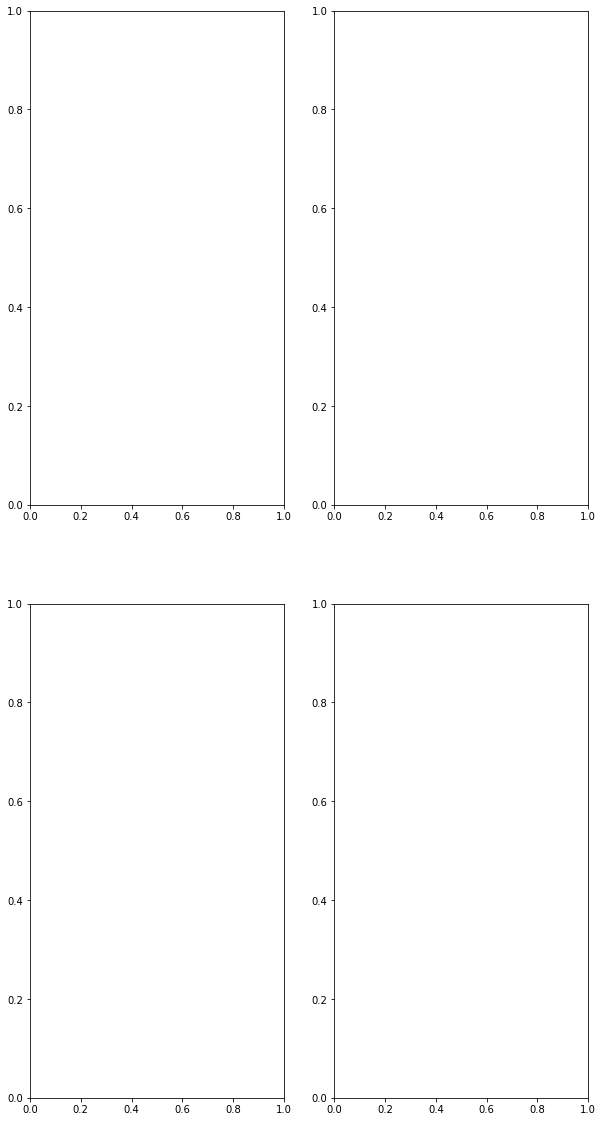

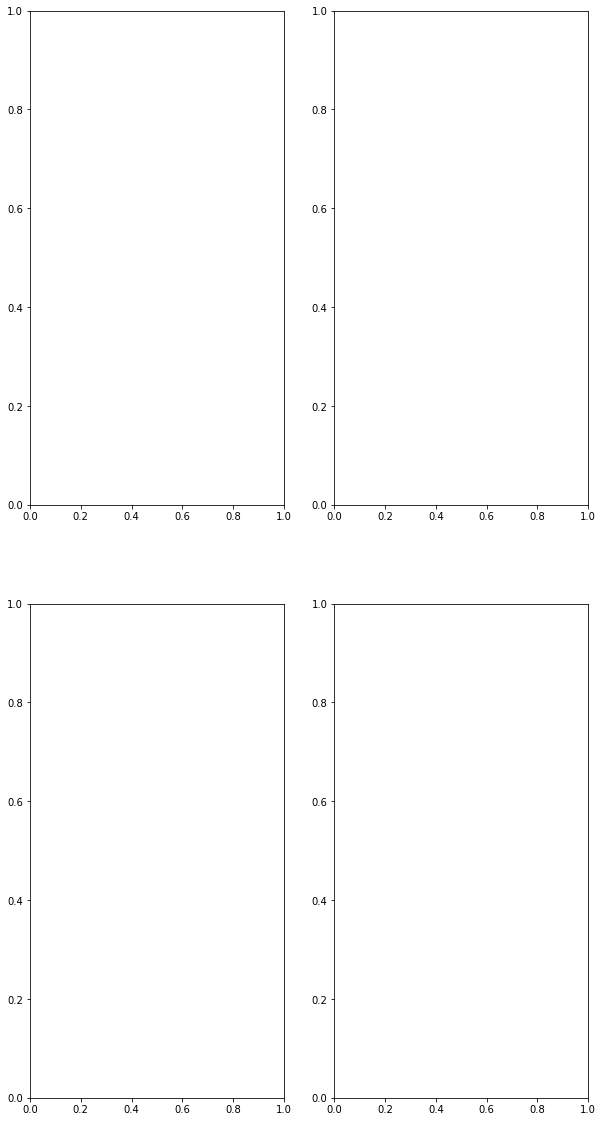

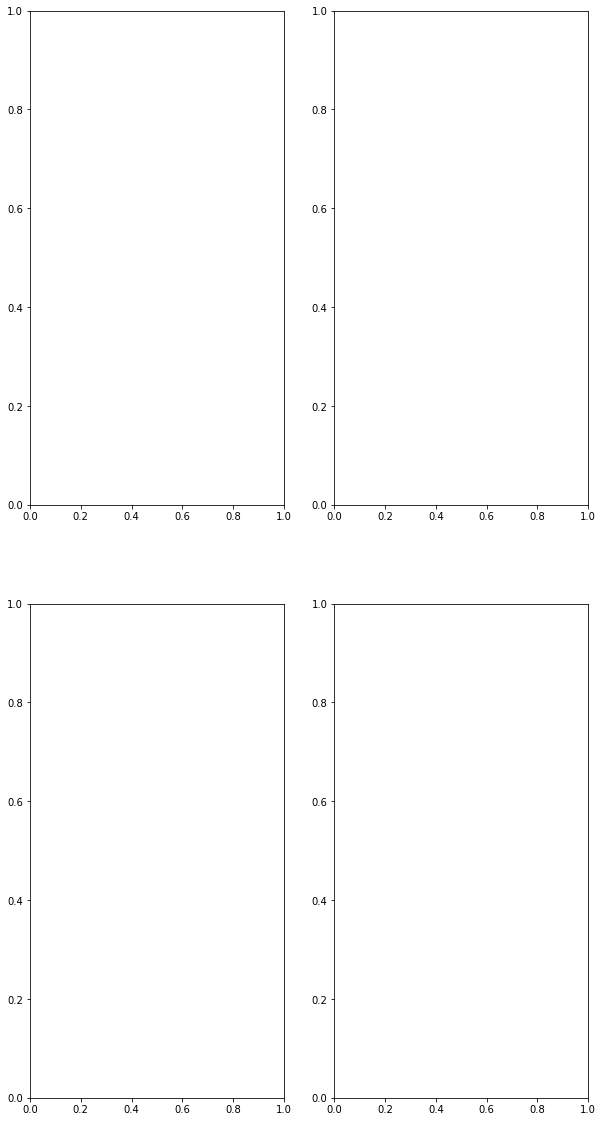

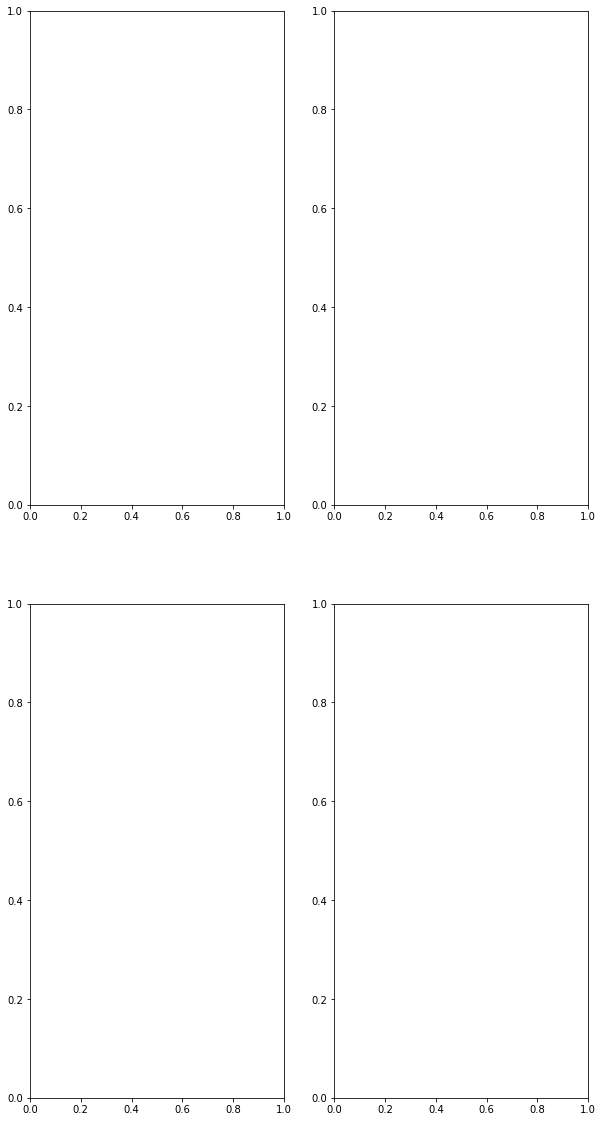

In [44]:
from notebooks.hmm.pred_func import pred_regression_methods
methods = ['lgb','LSTM','VAR','Kernel_RBF']
res_regre = []

for meth in methods:

    _, Val_pred, _ = pred_regression_methods(Data,ret,
                                    N_test=N_pred,
                                    method = meth,
                                    N_val = N_pred,
                                    pred_meth = 'rolling',
                                    p = 2,
                                    plot=False,
                                    perc_var=True)
    res_regre.append(Val_pred)

In [45]:
print(np.mean(abs(Val_Pred-Data[-N_pred:,:])))
print(Data[-N_pred:,:])
print(Val_Pred)
res_regre.append(Val_Pred)
methods.append('HHM_GGM2')

0.49922669600532066
[[ 3.166  13.13   41.8   ]
 [ 3.1749 13.62   43.02  ]
 [ 3.1456 13.55   42.77  ]
 [ 3.1271 13.03   41.71  ]
 [ 3.145  13.55   43.49  ]
 [ 3.1925 13.78   44.49  ]
 [ 3.1862 14.38   45.74  ]
 [ 3.2027 14.52   46.58  ]
 [ 3.2037 14.77   46.79  ]
 [ 3.2393 15.03   48.22  ]
 [ 3.2038 14.91   48.52  ]
 [ 3.2014 14.33   47.05  ]
 [ 3.2338 14.79   48.1   ]
 [ 3.2257 14.5    46.77  ]
 [ 3.2367 14.71   47.33  ]
 [ 3.2655 14.82   47.64  ]
 [ 3.2298 15.04   46.98  ]
 [ 3.2419 15.03   46.35  ]
 [ 3.2273 14.6    44.7   ]
 [ 3.2582 14.73   43.16  ]
 [ 3.2568 15.48   44.44  ]
 [ 3.2833 15.93   45.07  ]
 [ 3.1953 15.85   44.83  ]
 [ 3.2143 16.23   47.62  ]
 [ 3.2735 15.35   45.88  ]
 [ 3.2458 15.88   46.29  ]
 [ 3.3138 14.67   44.9   ]
 [ 3.3426 14.8    43.58  ]
 [ 3.3024 15.14   43.91  ]
 [ 3.2622 14.76   43.03  ]]
[[ 3.18990686 13.42777246 42.84853181]
 [ 3.16089193 13.14478022 41.60324689]
 [ 3.17174755 13.62010987 43.40184824]
 [ 3.14396979 13.56940507 42.47137942]
 [ 3.12631097

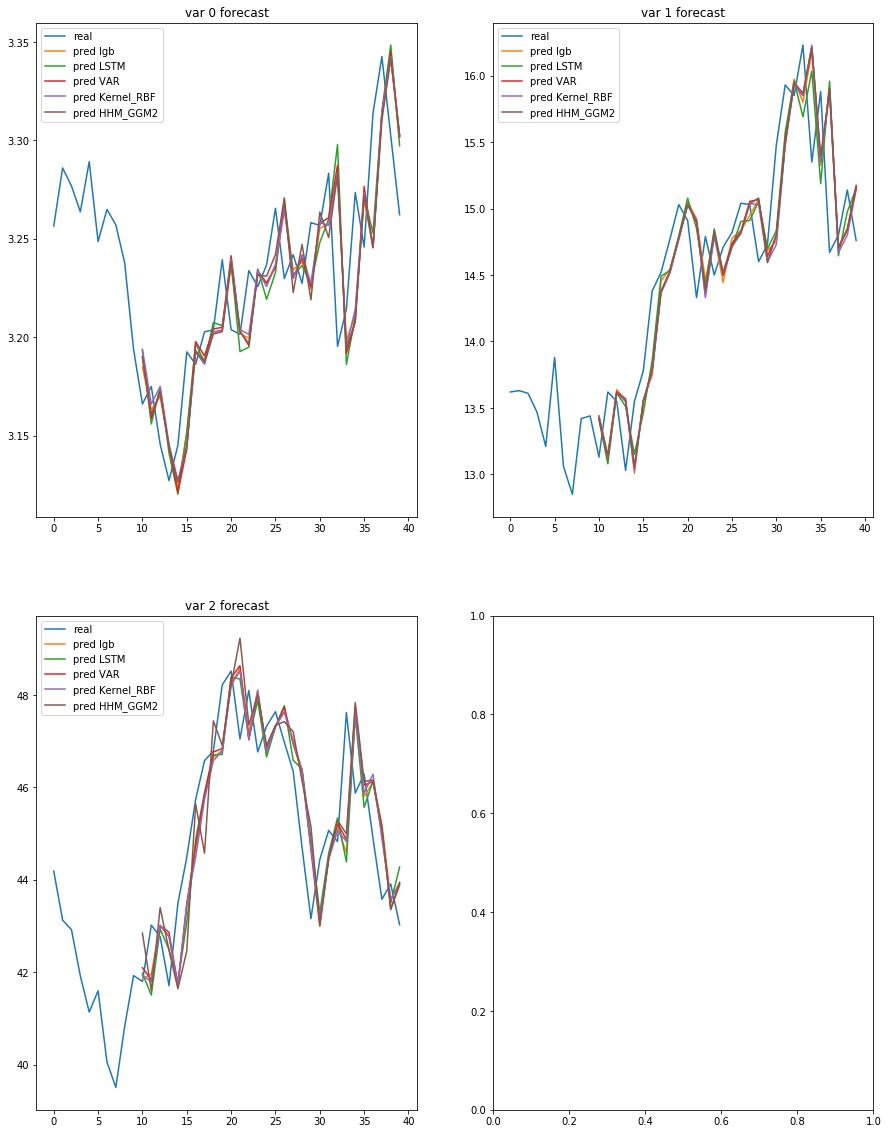

In [46]:
figsizex=15
figsizey=20
N_per_rows=2
N_mem = 10
N_test = N_pred
Dates = None
columns = None
N_TS = np.size(Data, axis=1)


N_rows = int(np.ceil(N_TS / N_per_rows))
f, axes = plt.subplots(N_rows, N_per_rows, figsize=(figsizex, figsizey))
list_all = []
for ts in range(N_TS):
    i = int(ts / N_per_rows)
    j = np.remainder(ts, N_per_rows)
    
    for n,Value_pred in enumerate(res_regre):
        
        absolute_error = abs(Data[-(N_test):,ts]-Value_pred[:,ts])
        MAE = np.mean(absolute_error)
        std = np.std(absolute_error)
        

        if Dates is None:
            x_mem = np.arange(N_mem + N_test)
            x = np.arange(N_mem,N_mem + N_test)
            if n==0:
                axes[i, j].plot(x_mem, Data[-(N_mem+N_test):,ts],label='real')
                #axes[i, j].plot(x, Data[-(N_test):,ts], 'o', label='real')
            axes[i, j].plot(x, Value_pred[:,ts],  label='pred '+str(methods[n]))
            if columns is None:
                axes[i, j].set_title('var ' + str(ts) + ' forecast')
                list_all.append([str(methods[n]),'var ' + str(ts),MAE,std])
            else:
                axes[i, j].set_title(str(columns[ts]) + ' forecast')
                list_all.append([str(methods[n]),str(columns[ts]),MAE,std])

        axes[i, j].legend()

In [47]:
import pandas as pd
df_recap = pd.DataFrame(list_all, columns=['method', 'TS', 'MAE', 'std AB'])

In [48]:
print(df_recap.to_string())

        method     TS       MAE    std AB
0          lgb  var 0  0.026189  0.019941
1         LSTM  var 0  0.029044  0.020006
2          VAR  var 0  0.028379  0.020478
3   Kernel_RBF  var 0  0.027327  0.019574
4     HHM_GGM2  var 0  0.028496  0.019831
5          lgb  var 1  0.363769  0.264529
6         LSTM  var 1  0.352798  0.259555
7          VAR  var 1  0.362670  0.260658
8   Kernel_RBF  var 1  0.369177  0.259375
9     HHM_GGM2  var 1  0.361229  0.254487
10         lgb  var 2  0.987441  0.632800
11        LSTM  var 2  1.000081  0.665351
12         VAR  var 2  0.988729  0.615093
13  Kernel_RBF  var 2  0.989333  0.603948
14    HHM_GGM2  var 2  1.107955  0.676306


In [28]:
df_recap.loc[df_recap['method'] == 'lgb']['MAE'].mean()

0.4591326332119194

In [25]:
df_recap.loc[df_recap['TS'] !='var2']

,method,TS,MAE,std AB
0,lgb,var 0,0.026189,0.019941
1,LSTM,var 0,0.029044,0.020006
2,VAR,var 0,0.028379,0.020478
3,Kernel_RBF,var 0,0.027327,0.019574
4,HHM_GGM2,var 0,0.027925,0.019831
5,lgb,var 1,0.363769,0.264529
6,LSTM,var 1,0.352798,0.259555
7,VAR,var 1,0.362670,0.260658
8,Kernel_RBF,var 1,0.369177,0.259375
9,HHM_GGM2,var 1,0.361229,0.254487


In [29]:
import pickle as pkl
with open('Forecast_real.pickle', 'wb') as f:
    pkl.dump([ret,Data,df_recap], f)

In [1]:
import pickle
with open('Forecast_real.pickle', 'rb') as f:
    [ret,Data,res_regre,df_recap] =  pickle.load(f)

In [14]:
from regain.hmm.utils_pred import reg_pred_HMM_GMM
N_pred = 30

ret_pred,_, Val_Pred =   reg_pred_HMM_GMM(ret,
                                   Data,
                                   [30],
                                   [2],
                                   N_retrain = N_pred,
                                   N_val = 1,
                                   p=2,
                                   N_test = N_pred,
                                   meth = 'viterbi',
                                   pred_meth = 'rolling',
                                   recrossval = False,
                                   CV_meth = 'reg',
                                   perc_var=True,
                                   single_var = True,
                                   var=1)

  0%|          | 0/1 [00:00<?, ?it/s]

Prev 0 Var 1



100%|██████████| 1/1 [00:10<00:00, 10.13s/it]


(30, 2)
4.565170697965218
MAE pred 0 Var 1 : 2.507130243609984
Prev 1 Var 1
MAE pred 1 Var 1 : 3.61874455067179
Prev 2 Var 1
MAE pred 2 Var 1 : 0.47231799852854767
Prev 3 Var 1
MAE pred 3 Var 1 : 3.980642649792847
Prev 4 Var 1
MAE pred 4 Var 1 : 4.0551841891533975
Prev 5 Var 1
MAE pred 5 Var 1 : 1.720185037723
Prev 6 Var 1
MAE pred 6 Var 1 : 4.196674772766064
Prev 7 Var 1
MAE pred 7 Var 1 : 0.9034982721470236
Prev 8 Var 1
MAE pred 8 Var 1 : 1.7012654984024258
Prev 9 Var 1
MAE pred 9 Var 1 : 1.7719075170353566
Prev 10 Var 1
MAE pred 10 Var 1 : 0.7419263720195238
Prev 11 Var 1
MAE pred 11 Var 1 : 4.137852936241722
Prev 12 Var 1
MAE pred 12 Var 1 : 3.1441365532910424
Prev 13 Var 1
MAE pred 13 Var 1 : 1.7854369525522367
Prev 14 Var 1
MAE pred 14 Var 1 : 1.599172947839001
Prev 15 Var 1
MAE pred 15 Var 1 : 0.9274424469888253
Prev 16 Var 1
MAE pred 16 Var 1 : 1.4827195011549321
Prev 17 Var 1
MAE pred 17 Var 1 : 0.0253437696240411
Prev 18 Var 1
MAE pred 18 Var 1 : 2.773585307489564
Prev 19 Var